# CREDIT RISK MODELLING
In this project, we will use the lending club data set provided by Kaggle to build a credit risk models that used customers feartures to determine:<br>

<li>.`PD`(probability of defaut) using a Logistic regression<br>
<li>.`EAD`(Exposure at Default) Using a linear regression<br>
<li>.`LGD`(Lost Given Default) using a linear regression<br>
For our PD Model, The variable loan Status will be our target. The model will predict a customer's PD notably whether he has defaulted or not giving certains features.<br>
    
For the LGD Model. We need to calculate how much of a loan was recovered after the borrower had defaulted.To do so, our target will be the variable `Recovery`<br>
For the EAD Model, We have to calculate the total exposure at the moment the borrower defaulted compared to the total exposure in the past. The target will be the total recovery principal variable will be our target for this Model<br>  
    
1. Problem definition
Given a borrower's characteristics, can we predict its probability of default.<br>
    
The data set can be found here https://www.kaggle.com/wordsforthewise/lending-club 

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set()
import os
import datetime as dt
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [426]:
df_backup = pd.read_csv(r"D:\DataBases\DataSets\loan_data_2007_2014.csv")#index_col='Date'

df_shape = (df_backup.shape)
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")
#print(f"Data timeperiod covers: {min(df_backup.index)} to {max(df_backup.index)}")
start = dt.datetime.now()
print("Time taken to run this cell :", datetime.now() - start)

There are 466285 rows and 75 columns in the dataset
Time taken to run this cell : 0:00:00


In [427]:
loan_data = df_backup.copy()

In [428]:
#To display all columns name
pd.options.display.max_columns = None

In [429]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [430]:
loan_data.isnull().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       27588
emp_length                      21008
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           340302
purpose                             0
title                              20
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs 

In [ ]:
# Investigate all the elements whithin each Feature 
for column in loan_data:
    unique_values = np.unique(loan_data[column])
    nr_values = len(unique_values)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_values))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

In [ ]:
sns.countplot(x="home_ownership", data=loan_data, palette="Set3")

In [ ]:
sns.catplot(x="", hue="", col="",
                data=loan_data, kind="count",
                height=4, aspect=.7);

In [ ]:
# Visualising a Subset of our data - important features
sns.pairplot(loan_data[['loan_amnt', 'annual_inc',"total_pymnt","home_ownership"]], hue = 'home_ownership', height = 5)

# 1.DATA PREPROCESSING

In [431]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

In [432]:
#The get info on the data type in each columns
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

**1.1 Preprocess all continuous varaibles into numerical values**

In [ ]:
#Some variables are expected to be numerical, but according to the info.method term of loan and employment length are object or string
#We have to transform them into integer

In [433]:
loan_data["emp_length"].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [434]:
#STR method to search a string and replace it by another string
#The sequence of replacement is important
loan_data["emp_length_int"] = loan_data["emp_length"].str.replace("\+ years", "")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("< 1 year", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace("n/a", str(0))
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" years", "")
loan_data["emp_length_int"] = loan_data["emp_length_int"].str.replace(" year", "")

In [435]:
#The variable still appear as string
type(loan_data["emp_length_int"][1])

str

In [436]:
#To transform a string into a numeric column
loan_data["emp_length_int"] = pd.to_numeric(loan_data["emp_length_int"])

type(loan_data["emp_length_int"][25])

numpy.float64

In [437]:
loan_data["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [438]:
#Replace months by empty space
loan_data["term_int"] = loan_data["term"].str.replace(" months", "")
loan_data["term_int"] = loan_data["term_int"].str.replace(" months", "")

In [439]:
#Convert string to numerical data
loan_data["term_int"] = pd.to_numeric(loan_data["term_int"])
type(loan_data["term_int"][1])

numpy.int64

In [440]:
#We have to calculate the time that has passed since the 1st credit line was issued
#We must convert these string into timestamps 
loan_data["earliest_cr_line"]

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [441]:
#To turn a string into a timestamps
loan_data["earliest_cr_line_date"] = pd.to_datetime(loan_data["earliest_cr_line"], format = "%b-%y")

In [442]:
#We know the date of the earliest credit line
#We need the time since the earliest credit line was issued for the model
#We need a reference date in order to calculate the time that has passed since the 1st credit line was issued.
#eg: let's consider 2018-12-01 as the reference date 
pd.to_datetime("2018-12-01") - loan_data["earliest_cr_line_date"] 

0        12387 days
1         7184 days
2         6239 days
3         8339 days
4         8370 days
            ...    
466280    5723 days
466281    7853 days
466282    6209 days
466283    5782 days
466284    6878 days
Name: earliest_cr_line_date, Length: 466285, dtype: timedelta64[ns]

In [443]:
#To convert the variable "mths_since_earliest_cr_line" into Months
loan_data["mths_since_earliest_cr_line"] = round(pd.to_numeric((pd.to_datetime("2018-12-01") - loan_data["earliest_cr_line_date"])/np.timedelta64(1, "M")))

In [444]:
loan_data["mths_since_earliest_cr_line"]

0         407.0
1         236.0
2         205.0
3         274.0
4         275.0
          ...  
466280    188.0
466281    258.0
466282    204.0
466283    190.0
466284    226.0
Name: mths_since_earliest_cr_line, Length: 466285, dtype: float64

In [445]:
loan_data["mths_since_earliest_cr_line"].describe()

count    466256.000000
mean        251.482430
std          93.974829
min        -600.000000
25%         195.000000
50%         237.000000
75%         297.000000
max         599.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [446]:
#the minimum is negative, We have to further investigate the data
loan_data.loc[:, ["earliest_cr_line", "earliest_cr_line_date","mths_since_earliest_cr_line"]][loan_data["mths_since_earliest_cr_line"] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-525.0
1770,Sep-68,2068-09-01,-597.0
2799,Sep-64,2064-09-01,-549.0
3282,Sep-67,2067-09-01,-585.0
3359,Feb-65,2065-02-01,-554.0
...,...,...,...
464003,Jan-68,2068-01-01,-589.0
464260,Jul-66,2066-07-01,-571.0
465100,Oct-67,2067-10-01,-586.0
465500,Sep-67,2067-09-01,-585.0


In [447]:
#The min time of the time since earliest cr was issued is negative 
#To correct we repalce all the negative values with the maximum observed normal value
loan_data["mths_since_earliest_cr_line"][loan_data["mths_since_earliest_cr_line"] < 0] = loan_data["mths_since_earliest_cr_line"].max() 

In [448]:
min(loan_data["mths_since_earliest_cr_line"])

85.0

In [449]:
loan_data["term_int"].describe()

count    466285.000000
mean         42.605334
std          10.719040
min          36.000000
25%          36.000000
50%          36.000000
75%          60.000000
max          60.000000
Name: term_int, dtype: float64

In [450]:
#We engineer the variable issue date
#The variable is on the %b-%y
loan_data["issue_d"]

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
466280    Jan-14
466281    Jan-14
466282    Jan-14
466283    Jan-14
466284    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [451]:
#To turn a string into a timestamps
loan_data['issue_date'] = pd.to_datetime(loan_data["issue_d"], format = "%b-%y")

In [452]:
#Consider today is 2018-12-01
pd.to_datetime("2018-12-01") - loan_data["issue_date"]

0        2557 days
1        2557 days
2        2557 days
3        2557 days
4        2557 days
            ...   
466280   1795 days
466281   1795 days
466282   1795 days
466283   1795 days
466284   1795 days
Name: issue_date, Length: 466285, dtype: timedelta64[ns]

In [453]:
loan_data["mths_since_issue_date"] = round(pd.to_numeric((pd.to_datetime("2018-12-01") - loan_data["issue_date"]) / np.timedelta64(1, "M")))

loan_data["mths_since_issue_date"].describe()

count    466285.000000
mean         63.255187
std          14.340154
min          48.000000
25%          53.000000
50%          59.000000
75%          69.000000
max         138.000000
Name: mths_since_issue_date, dtype: float64

In [454]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 81 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   Unnamed: 0                   466285 non-null  int64         
 1   id                           466285 non-null  int64         
 2   member_id                    466285 non-null  int64         
 3   loan_amnt                    466285 non-null  int64         
 4   funded_amnt                  466285 non-null  int64         
 5   funded_amnt_inv              466285 non-null  float64       
 6   term                         466285 non-null  object        
 7   int_rate                     466285 non-null  float64       
 8   installment                  466285 non-null  float64       
 9   grade                        466285 non-null  object        
 10  sub_grade                    466285 non-null  object        
 11  emp_title                 

**1.2 We create categorical variables**

In [ ]:
#We will creat discrete categorical varaibles for the variables
#"grade"
#"sub_grade"
#"home_ownership"
#"verification_status"
#"loan_status"
#"purpose"
#"initial_list_status"

In [455]:
loan_data["addr_state"].unique() 

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [456]:
loan_data_dummies =[pd.get_dummies(loan_data["grade"], prefix = "grade", prefix_sep = ":"), 
                    pd.get_dummies(loan_data["sub_grade"], prefix = "sub_grade", prefix_sep = ":"),
                    pd.get_dummies(loan_data["home_ownership"], prefix = "home_ownership", prefix_sep = ":"),
                    pd.get_dummies(loan_data["verification_status"], prefix = "verification_status", prefix_sep = ":"),
                    pd.get_dummies(loan_data["loan_status"], prefix = "loan_status", prefix_sep = ":"),
                    pd.get_dummies(loan_data["purpose"], prefix = "purpose", prefix_sep = ":"),
                    pd.get_dummies(loan_data["addr_state"], prefix = "addr_state", prefix_sep = ":"),
                    pd.get_dummies(loan_data["initial_list_status"], prefix = "initial_list_status", prefix_sep = ":")]
# We create dummy variables from all 8 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [457]:
loan_data_dummies = pd.concat(loan_data_dummies, axis = 1)

In [458]:
loan_data = pd.concat([loan_data, loan_data_dummies], axis = 1)

In [459]:
loan_data.columns.values

array(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       'sub_grade', 'emp_title', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
       'recoveries', 'collection_recovery_fee', 'last_pymnt_d',
       'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'veri

**1.3 Dealing with missing values**

In [461]:
pd.set_option('max_rows', 300)

In [462]:
loan_data.isnull().sum()

Unnamed: 0                                                              0
id                                                                      0
member_id                                                               0
loan_amnt                                                               0
funded_amnt                                                             0
funded_amnt_inv                                                         0
term                                                                    0
int_rate                                                                0
installment                                                             0
grade                                                                   0
sub_grade                                                               0
emp_title                                                           27588
emp_length                                                          21008
home_ownership                        

In [463]:
#the feature 'total_rev_hi_lim' has "70276" missing values
# 'Total revolving high credit/ credit limit', so it makes sense that the missing values are equal to funded_amnt.
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
# We fill the missing values with the values of another variable.

In [464]:
#To check if we still heve missing values
loan_data['total_rev_hi_lim'].isnull().sum()

0

In [465]:
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True)
# We fill the missing values with the mean value of the non-missing values.

In [466]:
loan_data['mths_since_earliest_cr_line'].fillna(0, inplace=True)
loan_data['acc_now_delinq'].fillna(0, inplace=True)
loan_data['total_acc'].fillna(0, inplace=True)
loan_data['pub_rec'].fillna(0, inplace=True)
loan_data['open_acc'].fillna(0, inplace=True)
loan_data['inq_last_6mths'].fillna(0, inplace=True)
loan_data['delinq_2yrs'].fillna(0, inplace=True)
loan_data['emp_length_int'].fillna(0, inplace=True)
# We fill the missing values with zeroes.

**1.4 We create our dependent or categorical variable for good and bad loan representing the PD**

In [467]:
#We check unique features
loan_data["loan_status"].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [468]:
#We count the number of observation for each unique features of our dependent variable
loan_data["loan_status"].value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [469]:
#We check the proportion of account /status
loan_data["loan_status"].value_counts() / loan_data["loan_status"].count()

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

In [470]:
#We will define 1=good loan and 0=bad loan;
#Where: check if a condition is true, return a specified value if a condition is true or another if the condition is false
#isin:check wheter a value is in alist of value
loan_data["good_bad"] = np.where(loan_data["loan_status"].isin(["Charged Off","Default ",
                                                               "Does not meet the credit policy. Status:Charged Off",
                                                               "Late (16-30 days)"]), 0, 1)

In [471]:
#Create dummies variables for continuous variables.to convey continuous variables into categories: Find Classing,
#weight of evidence method shows the extent to which the different categories of an independent variable explains a dependent variable 
#Coarse Classing: Process on constructing new categories based on initial ones
#Information value:
loan_data["good_bad"]

0         1
1         0
2         1
3         1
4         1
         ..
466280    1
466281    0
466282    1
466283    1
466284    1
Name: good_bad, Length: 466285, dtype: int32

**1.5 We divide the data into training set and test set**

In [472]:
from sklearn.model_selection import train_test_split

In [473]:
train_test_split(loan_data.drop("good_bad", axis = 1), loan_data["good_bad"])

[        Unnamed: 0        id  member_id  loan_amnt  funded_amnt  \
 382819      382819  16972760   19105295      11875        11875   
 340262      340262  22311452   24634407      13000        13000   
 405001      405001  14589952   16652266      32000        32000   
 282446      282446  29665291   32198540       8000         8000   
 386662      386662  16521771   18614281       9000         9000   
 ...            ...       ...        ...        ...          ...   
 374115      374115  18564608   20727312      21000        21000   
 232102      232102  37760481   40523235       3000         3000   
 332354      332354  22464606   24787208      15000        15000   
 388962      388962  16541735   18634239       9000         9000   
 115728      115728   6170142    7652285       2500         2500   
 
         funded_amnt_inv        term  int_rate  installment grade sub_grade  \
 382819          11875.0   36 months     16.99       423.32     D        D3   
 340262          13000.0

In [474]:
loan_data_inputs_train, loan_data_inputs_test,loan_data_targets_train, loan_data_targets_test =  train_test_split(loan_data.drop("good_bad", axis = 1), loan_data["good_bad"], test_size = 0.20, random_state = 24)

In [475]:
print("the size of the iputs traing set is: ", loan_data_inputs_train.shape)
print("the size of the targets traing set is: ", loan_data_targets_train.shape)
print("the size of the inputs test set is: ", loan_data_inputs_test.shape)
print("the size of the targets test set is: ", loan_data_targets_test.shape)

the size of the iputs traing set is:  (373028, 207)
the size of the targets traing set is:  (373028,)
the size of the inputs test set is:  (93257, 207)
the size of the targets test set is:  (93257,)


# 2. Data Preparation

In [594]:
#df_inputs_prep = loan_data_inputs_train
#df_targets_prep = loan_data_targets_train
df_inputs_prep = loan_data_inputs_test
df_targets_prep = loan_data_targets_test

In [595]:
print(df_inputs_prep.shape)
print(df_targets_prep.shape)

(93257, 207)
(93257,)


In [596]:
df_inputs_prep["grade"].unique()

array(['C', 'A', 'E', 'B', 'D', 'G', 'F'], dtype=object)

In [597]:
df1 = pd.concat([df_inputs_prep["grade"], df_targets_prep], axis = 1)
df1.head()

,grade,good_bad
161585,C,1
229952,A,1
36892,C,0
262682,E,0
250510,B,1


In [598]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].count()

,grade,good_bad
0,A,14835
1,B,27630
2,C,25030
3,D,15340
4,E,7105
5,F,2610
6,G,707


In [599]:
df1.groupby(df1.columns.values[0], as_index = False)[df1.columns.values[1]].mean()

,grade,good_bad
0,A,0.968655
1,B,0.929026
2,C,0.901838
3,D,0.866884
4,E,0.829416
5,F,0.786590
6,G,0.749646


In [600]:
df1 = pd.concat([df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].count(),
                 df1.groupby(df1.columns.values[0], as_index=False)[df1.columns.values[1]].mean()], axis = 1)

In [601]:
df1

,grade,good_bad,grade,good_bad
0,A,14835,A,0.968655
1,B,27630,B,0.929026
2,C,25030,C,0.901838
3,D,15340,D,0.866884
4,E,7105,E,0.829416
5,F,2610,F,0.786590
6,G,707,G,0.749646


In [602]:
df1 = df1.iloc[:, [0, 1, 3]]

In [603]:
df1.columns = [df1.columns.values[0], "n_obs", "prop_good"]
df1

,grade,n_obs,prop_good
0,A,14835,0.968655
1,B,27630,0.929026
2,C,25030,0.901838
3,D,15340,0.866884
4,E,7105,0.829416
5,F,2610,0.786590
6,G,707,0.749646


In [604]:
#We calculate weight of evidence and information value
#1.Proportion of observation that fall into each Grade= nber of info in each rows/ by the sum of nber of observation in each row
df1["prop_n_obs"] = df1["n_obs"] / df1["n_obs"].sum()
#2.Number of Good borrowers by Grade group
df1["n_good"] = df1["prop_good"] * df1["n_obs"]

In [605]:
#3.Number of Bad borrower = prop of bad borrower times nber of observation of respective grade 
#df1["n_bad"] = (1 - df1["prop_good"] * df1["n_obs"] 
df1['n_bad'] = (1 - df1['prop_good']) * df1['n_obs']  

In [606]:
#4.prop of god borrowers for each grade
df1["prop_n_good"] = df1["n_good"] / df1["n_good"].sum()
#5.prop of bad borrowers for each grade
df1["prop_n_bad"] = df1["n_bad"] / df1["n_bad"].sum()
df1  

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad
0,A,14835,0.968655,0.159077,14370.0,465.0,0.170289,0.052418
1,B,27630,0.929026,0.296278,25669.0,1961.0,0.304186,0.221057
2,C,25030,0.901838,0.268398,22573.0,2457.0,0.267497,0.276970
3,D,15340,0.866884,0.164492,13298.0,2042.0,0.157585,0.230188
4,E,7105,0.829416,0.076187,5893.0,1212.0,0.069834,0.136625
5,F,2610,0.786590,0.027987,2053.0,557.0,0.024329,0.062789
6,G,707,0.749646,0.007581,530.0,177.0,0.006281,0.019953


In [607]:
#Weight of Evidence of the variable grade
# We take the natural logarithm of a variable and save the result in a nex variable.
df1['WoE'] = np.log(df1['prop_n_good'] / df1['prop_n_bad'])
df1 = df1.sort_values(['WoE']) # Sorts a dataframe by the values of a given column.
df1 = df1.reset_index(drop = True) # We reset the index of a dataframe and overwrite it.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE
0,G,707,0.749646,0.007581,530.0,177.0,0.006281,0.019953,-1.155887
1,F,2610,0.786590,0.027987,2053.0,557.0,0.024329,0.062789,-0.948122
2,E,7105,0.829416,0.076187,5893.0,1212.0,0.069834,0.136625,-0.671121
3,D,15340,0.866884,0.164492,13298.0,2042.0,0.157585,0.230188,-0.378930
4,C,25030,0.901838,0.268398,22573.0,2457.0,0.267497,0.276970,-0.034801
5,B,27630,0.929026,0.296278,25669.0,1961.0,0.304186,0.221057,0.319216
6,A,14835,0.968655,0.159077,14370.0,465.0,0.170289,0.052418,1.178247


In [608]:
df1['diff_prop_good'] = df1['prop_good'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.
df1['diff_WoE'] = df1['WoE'].diff().abs()
# We take the difference between two subsequent values of a column. Then, we take the absolute value of the result.

In [609]:
df1['IV'] = (df1['prop_n_good'] - df1['prop_n_bad']) * df1['WoE']
df1['IV'] = df1['IV'].sum()
# We sum all values of a given column.
df1

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,707,0.749646,0.007581,530.0,177.0,0.006281,0.019953,-1.155887,NaN,NaN,0.290351
1,F,2610,0.786590,0.027987,2053.0,557.0,0.024329,0.062789,-0.948122,0.036944,0.207765,0.290351
2,E,7105,0.829416,0.076187,5893.0,1212.0,0.069834,0.136625,-0.671121,0.042826,0.277001,0.290351
3,D,15340,0.866884,0.164492,13298.0,2042.0,0.157585,0.230188,-0.378930,0.037468,0.292191,0.290351
4,C,25030,0.901838,0.268398,22573.0,2457.0,0.267497,0.276970,-0.034801,0.034954,0.344129,0.290351
5,B,27630,0.929026,0.296278,25669.0,1961.0,0.304186,0.221057,0.319216,0.027189,0.354016,0.290351
6,A,14835,0.968655,0.159077,14370.0,465.0,0.170289,0.052418,1.178247,0.039629,0.859031,0.290351


In [610]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df
# Here we combine all of the operations above in a function.
# The function takes 3 arguments: a dataframe, a string, and a dataframe. The function returns a dataframe as a result.

In [611]:
# We test the function with 'grade', the 1st argument= dataframe, 2nd=the categorical variable of interest, 3rd= dependent variable
df_temp = woe_discrete(df_inputs_prep, 'grade', df_targets_prep)
# We execute the function we defined with the necessary arguments: a dataframe, a string, and a dataframe.
# We store the result in a dataframe.
df_temp

,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,707,0.749646,0.007581,530.0,177.0,0.006281,0.019953,-1.155887,NaN,NaN,0.290351
1,F,2610,0.786590,0.027987,2053.0,557.0,0.024329,0.062789,-0.948122,0.036944,0.207765,0.290351
2,E,7105,0.829416,0.076187,5893.0,1212.0,0.069834,0.136625,-0.671121,0.042826,0.277001,0.290351
3,D,15340,0.866884,0.164492,13298.0,2042.0,0.157585,0.230188,-0.378930,0.037468,0.292191,0.290351
4,C,25030,0.901838,0.268398,22573.0,2457.0,0.267497,0.276970,-0.034801,0.034954,0.344129,0.290351
5,B,27630,0.929026,0.296278,25669.0,1961.0,0.304186,0.221057,0.319216,0.027189,0.354016,0.290351
6,A,14835,0.968655,0.159077,14370.0,465.0,0.170289,0.052418,1.178247,0.039629,0.859031,0.290351


In [612]:
# Below we define a function that takes 2 arguments: a dataframe and a number.
# The number parameter has a default value of 0.
# This means that if we call the function and omit the number parameter, it will be executed with it having a value of 0.
# The function displays a graph.
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # Turns the values of the column with index 0 to strings, makes an array from these strings, and passes it to variable x.
    y = df_WoE['WoE']
    # Selects a column with label 'WoE' and passes it to variable y.
    plt.figure(figsize=(18, 6))
    # Sets the graph size to width 18 x height 6.
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    # Plots the datapoints with coordiantes variable x on the x-axis and variable y on the y-axis.
    # Sets the marker for each datapoint to a circle, the style line between the points to dashed, and the color to black.
    plt.xlabel(df_WoE.columns[0])
    # Names the x-axis with the name of the column with index 0.
    plt.ylabel('Weight of Evidence')
    # Names the y-axis 'Weight of Evidence'.
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    # Names the grapth 'Weight of Evidence by ' the name of the column with index 0.
    plt.xticks(rotation = rotation_of_x_axis_labels)
    # Rotates the labels of the x-axis a predefined number of degrees.

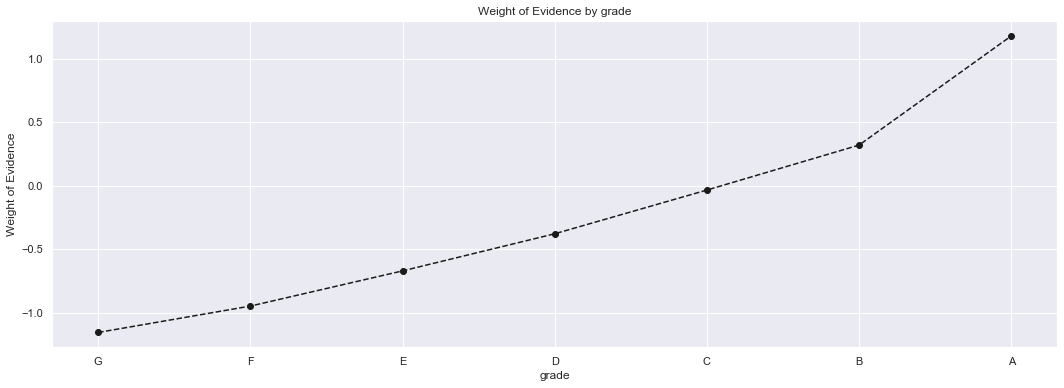

In [613]:
#We plot WoE of the variable "grade"
plot_by_woe(df_temp)
# We execute the function we defined with the necessary arguments: a dataframe.
# We omit the number argument, which means the function will use its default value, 0.

In [614]:
#Calculate the WoE for others discrete categorical variables and plot respectively for:
#
#home_ownership,
#sub_grade, 
#verification_status,
#loan_status,
#purpose,
#addr_state
#initial_list_status

df_temp = woe_discrete(df_inputs_prep,"addr_state" ,df_targets_prep)
df_temp

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,1,0.000000,0.000011,0.0,1.0,0.000000,0.000113,-inf,NaN,NaN,inf
1,ID,7,0.857143,0.000075,6.0,1.0,0.000071,0.000113,-0.460855,0.857143,inf,inf
2,NV,1264,0.872627,0.013554,1103.0,161.0,0.013071,0.018149,-0.328229,0.015484,0.132625,inf
3,AL,1145,0.876856,0.012278,1004.0,141.0,0.011898,0.015894,-0.289627,0.004229,0.038603,inf
4,FL,6387,0.891342,0.068488,5693.0,694.0,0.067464,0.078232,-0.148093,0.014486,0.141533,inf
5,OK,830,0.891566,0.008900,740.0,90.0,0.008769,0.010145,-0.145773,0.000224,0.002320,inf
6,HI,521,0.894434,0.005587,466.0,55.0,0.005522,0.006200,-0.115762,0.002868,0.030012,inf
7,NM,486,0.895062,0.005211,435.0,51.0,0.005155,0.005749,-0.109094,0.000628,0.006668,inf
8,NY,8038,0.896243,0.086192,7204.0,834.0,0.085370,0.094014,-0.096456,0.001181,0.012638,inf
9,MA,2156,0.896568,0.023119,1933.0,223.0,0.022907,0.025138,-0.092957,0.000325,0.003498,inf


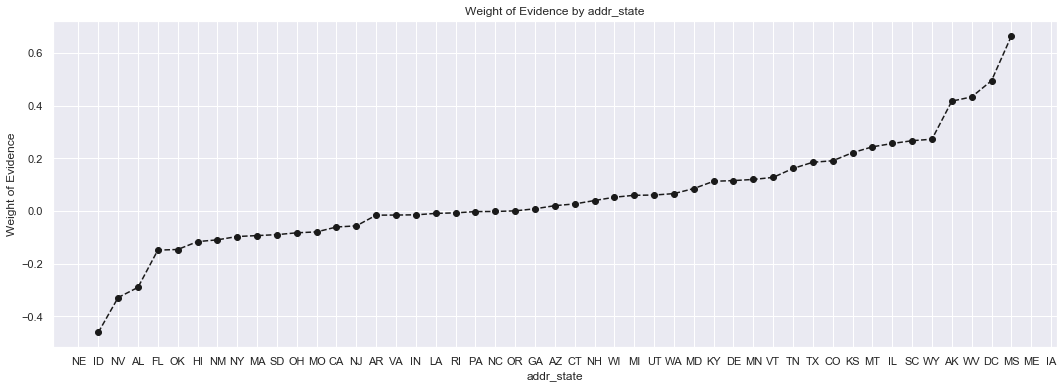

In [615]:
plot_by_woe(df_temp)
#We observe that the categories Other, and none are associated with the higher prob default but have few observations
#It doesnt make sense to have them as dummies but we don't want to loose them either.
#We have to combine such unrepresented categories with similar. In this case the riskiest category that have enough observations "Rent" 

In [616]:
#We have onlu 50 categories, however the us has 51 states. the state North Dakota is missing
#We will create a dummy variable for ND
#We create a function that will create a dummy for ND if there isn't any all set all its values to 0.do nothing if there is. 
if ['addr_state:ND'] in df_inputs_prep.columns.values:
    pass
else:
    df_inputs_prep['addr_state:ND'] = 0

In [498]:
#Based on the graph, the fist two and last two have respectivelly a very low and very high WoE.
#Similarly these categories a very few observations
#It is obvious that their exterme values of the WoE is caused by the low nber of observation
#We will include respectively "ME, ID" with the best category and "NE, IA" with the worst category

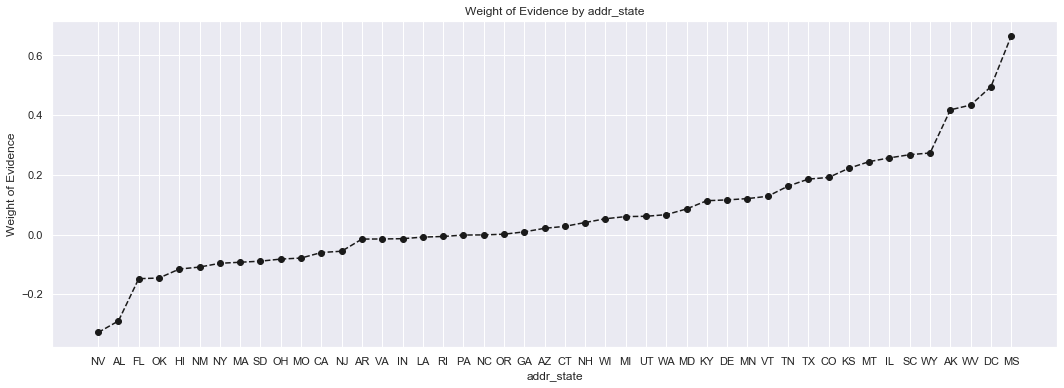

In [617]:
#Now let's investigate the WoE of the remaining 46 categories
plot_by_woe(df_temp.iloc[2: -2, :])

In [ ]:
#The states NV has a considerably low WoE compared to the next category, but low Nber of obs to considered as a unique category
#FL has a low WoE but a high nber of obs and is suitable to keep as separate category or put it in one category with other state.
#will combine NV with FL as well as with NE, IA
#Wil also inclode ND here, because we have no information. Based on our conservative assumption, we will class the state we have no information in the worst(high risk)
#We will also include Al & HI
# Our fist state category "WORST" or "HIGH RISK" will include "ND, NE, IA, NV, FL,AL,HI"

In [ ]:
#Similarly the state with the highest WoE acn be group together based on their low nber of obs 
# DC, WY, NH, WV will be combined with "ME, ID" 
# The Best category will include "DC, WY, NH, WV,ME, ID"


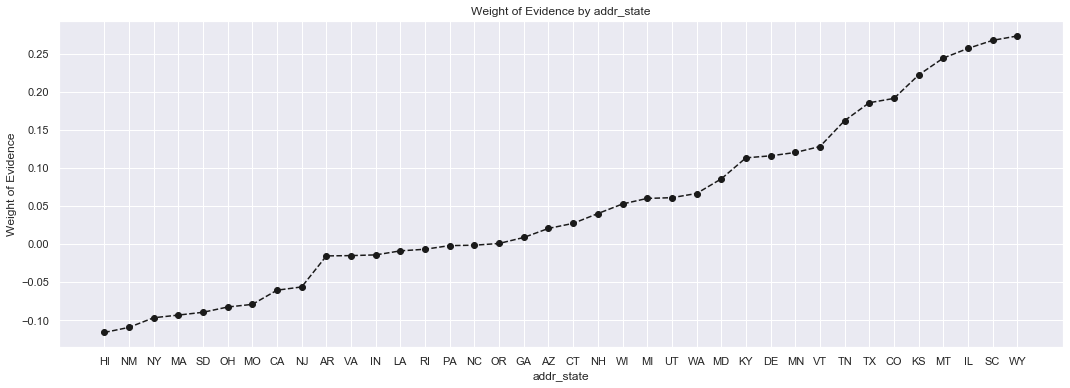

In [618]:
#We plot the graph excluding the 1st 6 and Last 6rows.
plot_by_woe(df_temp.iloc[6: -6, :])

In [ ]:
#Based on the graph from MO to VA the states have relatively the same WoE
#But when we look at the nber obs CA and NY stand out with their higher nber obs to be considered each as a separate categories
#"MO, MD" will be combined
#"LA, NC,NJ, NM, UT" will form a category
#"CA" will form a category
#"NY" will form a category
#"KY, MI, DE, VA" will form another category

In [ ]:
#We can see that state from MN to OK have similar weight.We have to check the nber of observation to see if one of them stand out in term of nber of obs
# None of them stand out
#We will combine "MN, PA, AZ, AR, WA, TN, OK"

In [ ]:
#Similar to OH until WI
# None stand out in nber of obs
#We will combine "OH, RI, IN, GA, MA, OR, WI" in one single category

In [ ]:
#From SD to CT, the state have almost similar WoE but TX has an of the highest nber of obs to be considered alone as separate category
#So we will combine "SD, IL" in one category
#"TX" in separate category
#"KS, CT" will be combine together

In [ ]:
#From the graph, CO, MS, SC, AK,VT, MT have a considerably higher WoE compared to other categories but none have a higher nber of obs
#This makes the WoE less reliable however is enough indicative that borrowers in these states will most likely be better than borrowers in others states
#We will combine "CO,MS,SC,AK,VT, MT" in one category

In [619]:
df_temp["addr_state"]

0     NE
1     ID
2     NV
3     AL
4     FL
5     OK
6     HI
7     NM
8     NY
9     MA
10    SD
11    OH
12    MO
13    CA
14    NJ
15    AR
16    VA
17    IN
18    LA
19    RI
20    PA
21    NC
22    OR
23    GA
24    AZ
25    CT
26    NH
27    WI
28    MI
29    UT
30    WA
31    MD
32    KY
33    DE
34    MN
35    VT
36    TN
37    TX
38    CO
39    KS
40    MT
41    IL
42    SC
43    WY
44    AK
45    WV
46    DC
47    MS
48    ME
49    IA
Name: addr_state, dtype: object

In [ ]:
#The Have to create the actual dummies variables. The reference category will be the category with the lowest WoE.
#"ND, NE, IA, NV, FL, AL, HI" = High risk
#"MO, MD" 
#"LA, NC,NJ, NM, UT" 
#"CA" 
#"NY"
#"KY, MI, DE, VA" 
#"MN, PA, AZ, AR, WA, TN, OK"
#"OH, RI, IN, GA, MA, OR, WI"
#"SD, IL"
#TX
#"KS, CT"
#"CO,MS,SC,AK,VT, MT
#"WV, NH, WY,DC,ME, ID" = Best

In [620]:
#"ND, NE, IA, NV, FL, AL, HI"
df_inputs_prep['addr_state:ND_NE_IA_NV_FL_AL_HI'] = sum([df_inputs_prep['addr_state:ND'], df_inputs_prep['addr_state:NE'],
                                                         df_inputs_prep['addr_state:IA'], df_inputs_prep['addr_state:NV'],
                                                         df_inputs_prep['addr_state:FL'], df_inputs_prep['addr_state:AL'],
                                                         df_inputs_prep['addr_state:HI']])

In [621]:
#"MO, MD"
df_inputs_prep['addr_state:MO_MD'] = sum([df_inputs_prep['addr_state:MO'], df_inputs_prep['addr_state:MD']])

In [622]:
#LA, NC,NJ, NM, UT
df_inputs_prep['addr_state:LA_NC_NJ_NM_UT'] = sum([df_inputs_prep['addr_state:LA'], df_inputs_prep['addr_state:NC'],
                                                         df_inputs_prep['addr_state:NJ'], df_inputs_prep['addr_state:NM'],
                                                         df_inputs_prep['addr_state:UT']])

In [623]:
#KY, MI, DE, VA
df_inputs_prep['addr_state:KY_MI_DE_VA'] = sum([df_inputs_prep['addr_state:KY'], df_inputs_prep['addr_state:MI'],
                                                         df_inputs_prep['addr_state:DE'], df_inputs_prep['addr_state:VA']])

In [624]:
#MN, PA, AZ, AR, WA, TN, OK
df_inputs_prep['addr_state:MN_PA_AZ_AR_WA_TN_OK'] = sum([df_inputs_prep['addr_state:MN'], df_inputs_prep['addr_state:PA'],
                                                         df_inputs_prep['addr_state:AZ'], df_inputs_prep['addr_state:AR'],
                                                         df_inputs_prep['addr_state:WA'],df_inputs_prep['addr_state:TN'],
                                                        df_inputs_prep['addr_state:OK']])

In [625]:
#OH, RI, IN, GA, MA, OR, WI
df_inputs_prep['addr_state:OH_RI_IN_GA_MA_OR_WI'] = sum([df_inputs_prep['addr_state:OH'], df_inputs_prep['addr_state:RI'],
                                                         df_inputs_prep['addr_state:IN'], df_inputs_prep['addr_state:GA'],
                                                         df_inputs_prep['addr_state:MA'],df_inputs_prep['addr_state:OR'],
                                                        df_inputs_prep['addr_state:WI']])

In [626]:
#SD, IL
df_inputs_prep['addr_state:SD_IL'] = sum([df_inputs_prep['addr_state:SD'], df_inputs_prep['addr_state:IL']])

#KS, CT
df_inputs_prep['addr_state:KS_CT'] = sum([df_inputs_prep['addr_state:KS'], df_inputs_prep['addr_state:CT']])

In [627]:
#CO,MS,SC,AK,VT, MT
df_inputs_prep['addr_state:CO_MS_SC_AK_VT_MT'] = sum([df_inputs_prep['addr_state:CO'], df_inputs_prep['addr_state:MS'],
                                                         df_inputs_prep['addr_state:SC'], df_inputs_prep['addr_state:AK'],
                                                         df_inputs_prep['addr_state:VT'],df_inputs_prep['addr_state:MT']])

In [628]:
#WV, NH, WY,DC,ME, ID (Best)
df_inputs_prep['addr_state:WV_NH_WY_DC_ME_ID'] = sum([df_inputs_prep['addr_state:WV'], df_inputs_prep['addr_state:NH'],
                                                         df_inputs_prep['addr_state:WY'], df_inputs_prep['addr_state:DC'],
                                                         df_inputs_prep['addr_state:ME'],df_inputs_prep['addr_state:ID']])

**2.1 Preprocessing Others Discrete Variables**

In [629]:
df_temp = woe_discrete(df_inputs_prep,"home_ownership" ,df_targets_prep)
df_temp

,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NONE,6,0.666667,0.000064,4.0,2.0,0.000047,0.000225,-1.559467,NaN,NaN,inf
1,OTHER,34,0.676471,0.000365,23.0,11.0,0.000273,0.001240,-1.515015,0.009804,0.044452,inf
2,RENT,37818,0.888519,0.405525,33602.0,4216.0,0.398194,0.475256,-0.176915,0.212048,1.338100,inf
3,OWN,8294,0.908609,0.088937,7536.0,758.0,0.089304,0.085447,0.044149,0.020090,0.221065,inf
4,MORTGAGE,47104,0.917544,0.505099,43220.0,3884.0,0.512170,0.437831,0.156824,0.008936,0.112674,inf
5,ANY,1,1.000000,0.000011,1.0,0.0,0.000012,0.000000,inf,0.082456,inf,inf


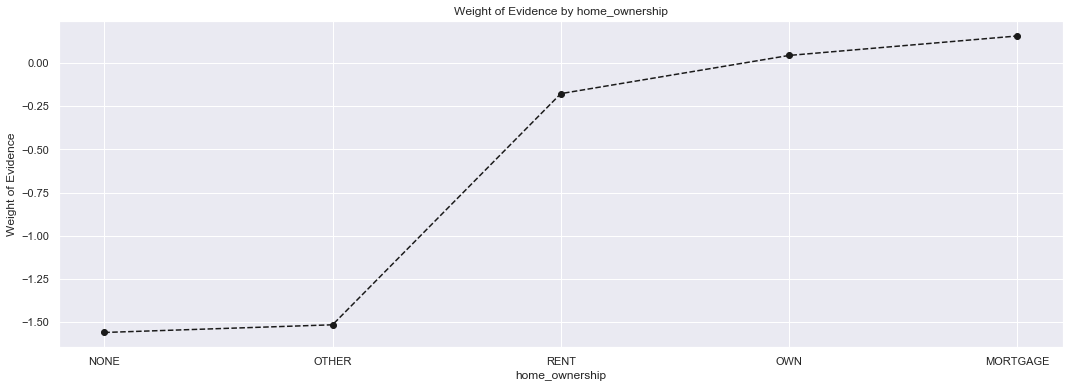

In [630]:
plot_by_woe(df_temp)

In [631]:
#We combine the categories "Other"&"None" with the category "Rent"
#The dummie "RENT_OTHER_NONE" will be equal to 1 if the borrower has any of the 3 categories and 0 otherwise
#We can achiece this by summing the existing 3 dummies for each of theexisting categories
df_inputs_prep["home_ownership:RENT_OTHER_NONE"] = sum([df_inputs_prep["home_ownership:RENT"],df_inputs_prep["home_ownership:OTHER"],
                                                       df_inputs_prep["home_ownership:NONE"]])

In [632]:
#The variables Verification status, purpose of the loan and initial_list_status
#The variable verification_status
df_temp = woe_discrete(df_inputs_prep, 'verification_status', df_targets_prep)
df_temp

,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Verified,33670,0.887704,0.361045,29889.0,3781.0,0.354194,0.42622,-0.185112,NaN,NaN,0.022257
1,Source Verified,29991,0.912574,0.321595,27369.0,2622.0,0.324331,0.29557,0.092860,0.024870,0.277972,0.022257
2,Not Verified,29596,0.916610,0.317360,27128.0,2468.0,0.321475,0.27821,0.144544,0.004037,0.051685,0.022257


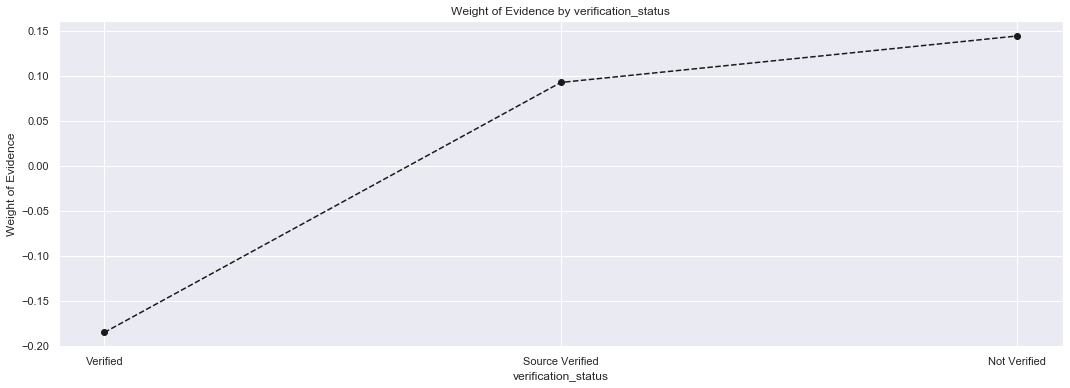

In [633]:
#Based on the plot, Not verified category has the highest WoE while Verified tha lowest. by looking at the nber of obs,
# the three have a similar nber of obs and are considerably high to be keep as separate variables
#The variable Verification status will have 3 different categories respectively
#"Veified"
#"Source_verified"
#"Not_Verified"
plot_by_woe(df_temp)

In [634]:
#The variables purpose of the loan
df_temp = woe_discrete(df_inputs_prep, 'purpose', df_targets_prep)
df_temp

,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,104,0.798077,0.001115,83.0,21.0,0.000984,0.002367,-0.878296,NaN,NaN,0.046474
1,small_business,1423,0.807449,0.015259,1149.0,274.0,0.013616,0.030887,-0.819095,0.009372,0.059201,0.046474
2,renewable_energy,68,0.852941,0.000729,58.0,10.0,0.000687,0.001127,-0.494756,0.045492,0.324339,0.046474
3,moving,610,0.859016,0.006541,524.0,86.0,0.006210,0.009695,-0.445470,0.006075,0.049286,0.046474
4,house,465,0.864516,0.004986,402.0,63.0,0.004764,0.007102,-0.399297,0.005500,0.046173,0.046474
5,medical,896,0.875000,0.009608,784.0,112.0,0.009291,0.012625,-0.306704,0.010484,0.092593,0.046474
6,other,4717,0.876616,0.050581,4135.0,582.0,0.049001,0.065607,-0.291842,0.001616,0.014862,0.046474
7,wedding,482,0.883817,0.005169,426.0,56.0,0.005048,0.006313,-0.223526,0.007201,0.068315,0.046474
8,debt_consolidation,54898,0.900834,0.588674,49454.0,5444.0,0.586045,0.613685,-0.046085,0.017017,0.177441,0.046474
9,vacation,524,0.906489,0.005619,475.0,49.0,0.005629,0.005524,0.018881,0.005654,0.064966,0.046474


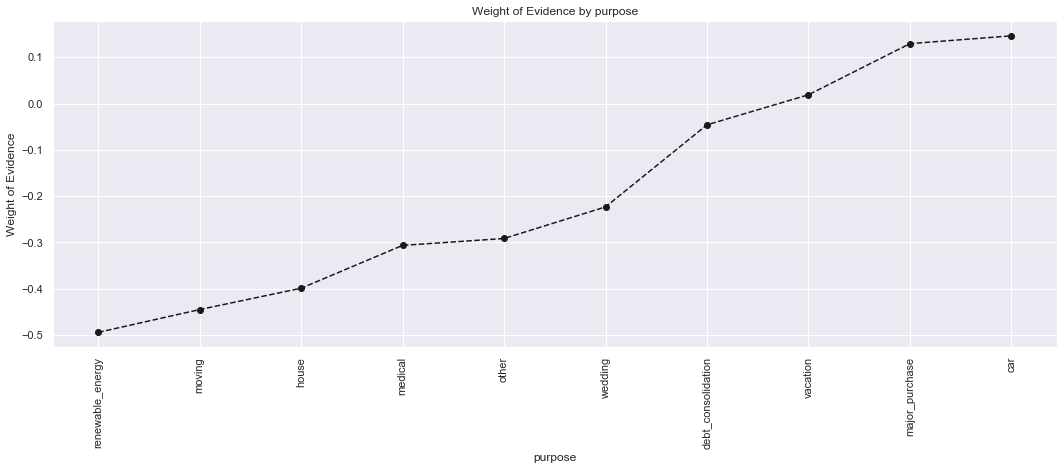

In [635]:
plot_by_woe(df_temp.iloc[2: -2,:], 90)
#The argument 90 is to rotate the names by 90°
#the categories "educational, small_business, renewable_energy, moving" have the lowest WoE and few number of observations to be considered as separate categories
#We will consider "educational, small_business" as the (worst)
#In the opposite the "credit_card " category has the highest WoE and the 2nd high nber of obs.the category "credit_card" will be considered as separate category  
#similarly "car" has a high WoE but a low nber of obs to be separate category.we will combine "car, home_improvement, major_purchase"

In [ ]:
#"renewable_energy, moving" have a low WoE and low nber obs. we will combine "educational, small_business,renewable_energy, moving"
#"home_improvement" has a high WoE and nber obs to be a separate category, "major_purchase" similarly has a high WoE but a low nbs of obs
#We will combine "car, home_improvement, major_purchase"
#"debt-consolidation" has the highest WoE and nbr of obs,we will consider as a separate category
#"vacation, medical, wedding, house" have the approx the similar WoE and a low nbr of obs. we will combine them together to obtain 
#an unique variable "vacation, medical, wedding, house" 
#"other" has the 3rd highest nbr of obs and can be considered as a separate variable"other"
#we will combine our categorical variables as follow from the worst to best

#"educational, small_business, renewable_energy, moving" 
#"other, vacation, medical, wedding, house"
#"debt_consolidation"
#"car, home_improvement, major_purchase"
#"credit_card"

In [636]:
#educational, small_business, renewable_energy, moving 
df_inputs_prep['purpose:edu_smbus_ren_mov'] = sum([df_inputs_prep['purpose:educational'], df_inputs_prep['purpose:small_business'],
                                                         df_inputs_prep['purpose:renewable_energy'], df_inputs_prep['purpose:moving']])

In [637]:
#other, vacation, medical, wedding, house
df_inputs_prep['purpose:other_vac_med_wedd_hse'] = sum([df_inputs_prep['purpose:other'], df_inputs_prep['purpose:vacation'],
                                                         df_inputs_prep['purpose:wedding'], df_inputs_prep['purpose:house']])

In [638]:
#car, home_improvement, major_purchase
df_inputs_prep['purpose:car_home_imp_mjpurchase'] = sum([df_inputs_prep['purpose:car'], df_inputs_prep['purpose:home_improvement'],
                                                         df_inputs_prep['purpose:major_purchase']])

In [639]:
#The variables initial_list_status
df_temp = woe_discrete(df_inputs_prep, 'initial_list_status', df_targets_prep)
df_temp

,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,f,60642,0.893193,0.650268,54165.0,6477.0,0.641872,0.730132,-0.128836,NaN,NaN,0.036345
1,w,32615,0.926598,0.349732,30221.0,2394.0,0.358128,0.269868,0.282957,0.033405,0.411794,0.036345


**2.2 Preprocessing Continuous variables**

In [ ]:
#we will transform the continuous variables "term, salary, emp_lenght_int"

In [640]:
def woe_ordered_continuous(df, discrete_variable_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [641]:
#The variables term_int
df_temp = woe_ordered_continuous(df_inputs_prep, 'term_int', df_targets_prep)
df_temp

,term_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,36,67600,0.914571,0.724879,61825.0,5775.0,0.732645,0.650998,0.118156,NaN,NaN,0.031406
1,60,25657,0.879331,0.275121,22561.0,3096.0,0.267355,0.349002,-0.266502,0.03524,0.384658,0.031406


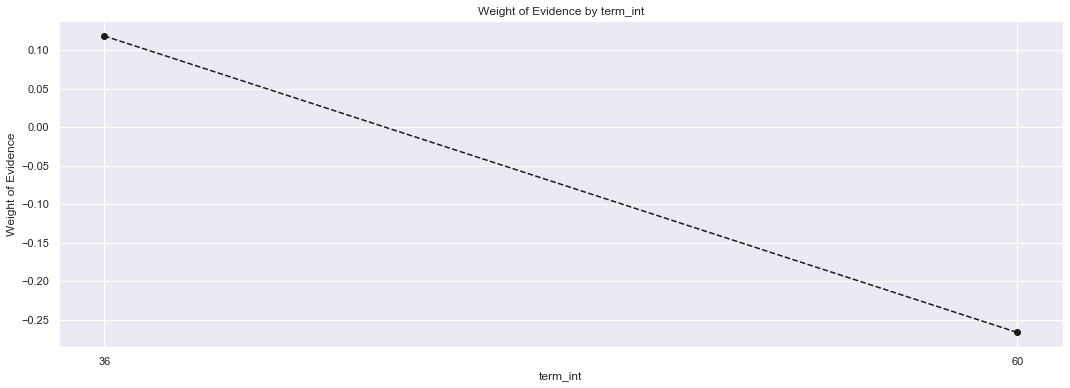

In [642]:
plot_by_woe(df_temp)
#It indicates tthat 60 mths loan are riskier than 30 months loan.
#we will create 2 dummies variables 60 and 36 using the month_int categorical variable. the riskier dummy 60 will be set as the reference

In [643]:
# Leave as is.
# '60' will be the reference category.
#We use the np.method to create two variables that will take the values 1 where term=36 and 0 where term=60
df_inputs_prep['term:36'] = np.where((df_inputs_prep['term_int'] == 36), 1, 0)
df_inputs_prep['term:60'] = np.where((df_inputs_prep['term_int'] == 60), 1, 0)

In [644]:
# emp_length_int
df_inputs_prep['emp_length_int'].unique()
# Has only 11 levels: from 0 to 10. Hence, we turn it into a factor with 11 levels.

array([ 3.,  2.,  6.,  0., 10.,  1.,  9.,  7.,  4.,  8.,  5.])

In [645]:
df_temp = woe_ordered_continuous(df_inputs_prep, 'emp_length_int', df_targets_prep)
# We calculate weight of evidence.
df_temp

,emp_length_int,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,11415,0.895050,0.122404,10217.0,1198.0,0.121075,0.135047,-0.109214,NaN,NaN,0.006549
1,1.0,5964,0.907948,0.063952,5415.0,549.0,0.064169,0.061887,0.036216,0.012897,0.145430,0.006549
2,2.0,8337,0.900804,0.089398,7510.0,827.0,0.088996,0.093225,-0.046428,0.007144,0.082644,0.006549
3,3.0,7400,0.901892,0.079351,6674.0,726.0,0.079089,0.081840,-0.034189,0.001088,0.012239,0.006549
4,4.0,5591,0.905920,0.059953,5065.0,526.0,0.060022,0.059294,0.012194,0.004028,0.046384,0.006549
5,5.0,6109,0.895237,0.065507,5469.0,640.0,0.064809,0.072145,-0.107231,0.010684,0.119425,0.006549
6,6.0,5164,0.896785,0.055374,4631.0,533.0,0.054879,0.060083,-0.090607,0.001549,0.016624,0.006549
7,7.0,5174,0.906649,0.055481,4691.0,483.0,0.055590,0.054447,0.020770,0.009863,0.111378,0.006549
8,8.0,4434,0.903248,0.047546,4005.0,429.0,0.047460,0.048360,-0.018772,0.003401,0.039542,0.006549
9,9.0,3597,0.901307,0.038571,3242.0,355.0,0.038419,0.040018,-0.040786,0.001941,0.022014,0.006549


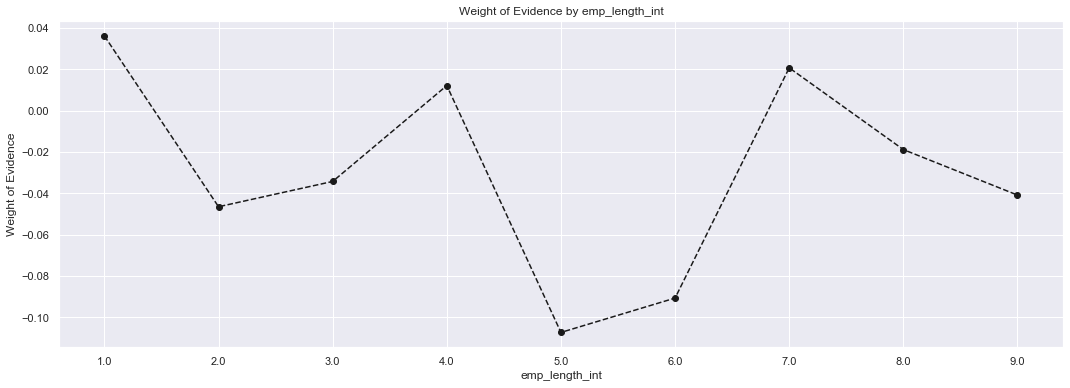

In [646]:
plot_by_woe(df_temp.iloc[1:-1, :])
# We plot the weight of evidence values.

In [647]:
#the category "O" or less than 1year has the lowest WoE but the second highest nbr of obs.
#We will set "0" as a separate category
#In the opposite, "10" shows the highest WoE and highest nbr obs to be consider as a separate category
#the category "1" has a much lower WoE relative other others categories, we will consider "1" as a separate category. 
#"2" and "3" have a similare WoE and and low nbr of obs. "4" as well has a low nbr of obs, We will combine the 3 categories "2, 3, 4"
#"5" and "6" have similar WoE and los nbr of obs. we will combine the 2 categories "5, 6"
#"7", "8", "9" are amongst th highest WoE but the lowest nbr of obs. we will combine them. "7, 8, 9" 

# We create the following categories: '0', '1', '2 - 4', '5 - 6', '7 - 9', '10'
# '0' will be the reference category
df_inputs_prep['emp_length:0'] = np.where(df_inputs_prep['emp_length_int'].isin([0]), 1, 0)
df_inputs_prep['emp_length:1'] = np.where(df_inputs_prep['emp_length_int'].isin([1]), 1, 0)
df_inputs_prep['emp_length:2-4'] = np.where(df_inputs_prep['emp_length_int'].isin(range(2, 5)), 1, 0)
df_inputs_prep['emp_length:5-6'] = np.where(df_inputs_prep['emp_length_int'].isin(range(5, 7)), 1, 0)
df_inputs_prep['emp_length:7-9'] = np.where(df_inputs_prep['emp_length_int'].isin(range(7, 10)), 1, 0)
df_inputs_prep['emp_length:10'] = np.where(df_inputs_prep['emp_length_int'].isin([10]), 1, 0)

In [648]:
#3.Continuous variables months since issue date
df_inputs_prep['mths_since_issue_date'].unique()
#this variable has 90 categories
#We will apply Fine classing: roughly grouping the values into categories
#coarse classing:determining final categories, combine few of the initial fine classing categories into bigger categories

array([ 69.,  83., 115.,  49.,  80.,  54., 100.,  56.,  85., 101.,  48.,
        70.,  53.,  59.,  63.,  60.,  55.,  58.,  71., 109.,  50.,  65.,
        57.,  76.,  66.,  61., 111.,  77., 118.,  68.,  67.,  62.,  51.,
        73., 122.,  78.,  79., 103.,  72.,  82.,  52.,  87., 104.,  94.,
        64.,  90.,  93., 106.,  96.,  89., 110., 108.,  75.,  84.,  81.,
       121.,  91.,  97.,  74., 107.,  99.,  86., 128., 129., 133., 114.,
       102.,  88.,  92., 105.,  98.,  95., 120., 112., 119., 117., 132.,
       125., 126., 130., 116., 113., 135., 131., 127., 124., 137., 138.,
       123., 134., 136.])

In [649]:
df_inputs_prep['mths_since_issue_date_factor'] = pd.cut(df_inputs_prep['mths_since_issue_date'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [650]:
#We divided 
df_inputs_prep['mths_since_issue_date_factor']

161585      (67.8, 69.6]
229952      (82.2, 84.0]
36892     (114.6, 116.4]
262682     (47.91, 49.8]
250510     (47.91, 49.8]
               ...      
429064      (55.2, 57.0]
338586      (51.6, 53.4]
8858        (87.6, 89.4]
42861       (58.8, 60.6]
389074      (53.4, 55.2]
Name: mths_since_issue_date_factor, Length: 93257, dtype: category
Categories (50, interval[float64]): [(47.91, 49.8] < (49.8, 51.6] < (51.6, 53.4] < (53.4, 55.2] ... (130.8, 132.6] < (132.6, 134.4] < (134.4, 136.2] < (136.2, 138.0]]

In [651]:
# mths_since_issue_d
df_temp = woe_ordered_continuous(df_inputs_prep, 'mths_since_issue_date_factor', df_targets_prep)
# We calculate WoE.
df_temp

,mths_since_issue_date_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(47.91, 49.8]",7157,0.961995,0.076745,6885.0,272.0,0.081589,0.030662,0.978684,NaN,NaN,0.216859
1,"(49.8, 51.6]",9904,0.951939,0.106201,9428.0,476.0,0.111725,0.053658,0.733407,0.010057,0.245277,0.216859
2,"(51.6, 53.4]",9769,0.937660,0.104754,9160.0,609.0,0.108549,0.068651,0.458169,0.014279,0.275238,0.216859
3,"(53.4, 55.2]",7311,0.924361,0.078396,6758.0,553.0,0.080084,0.062338,0.250510,0.013299,0.207659,0.216859
4,"(55.2, 57.0]",7121,0.918832,0.076359,6543.0,578.0,0.077537,0.065156,0.173963,0.005529,0.076547,0.216859
5,"(57.0, 58.8]",3008,0.916223,0.032255,2756.0,252.0,0.032659,0.028407,0.139493,0.002608,0.034471,0.216859
6,"(58.8, 60.6]",6128,0.914001,0.065711,5601.0,527.0,0.066374,0.059407,0.110886,0.002222,0.028607,0.216859
7,"(60.6, 62.4]",5740,0.912021,0.061550,5235.0,505.0,0.062036,0.056927,0.085950,0.001980,0.024936,0.216859
8,"(62.4, 64.2]",5077,0.890290,0.054441,4520.0,557.0,0.053563,0.062789,-0.158912,0.021731,0.244862,0.216859
9,"(64.2, 66.0]",4487,0.880098,0.048114,3949.0,538.0,0.046797,0.060647,-0.259255,0.010191,0.100343,0.216859


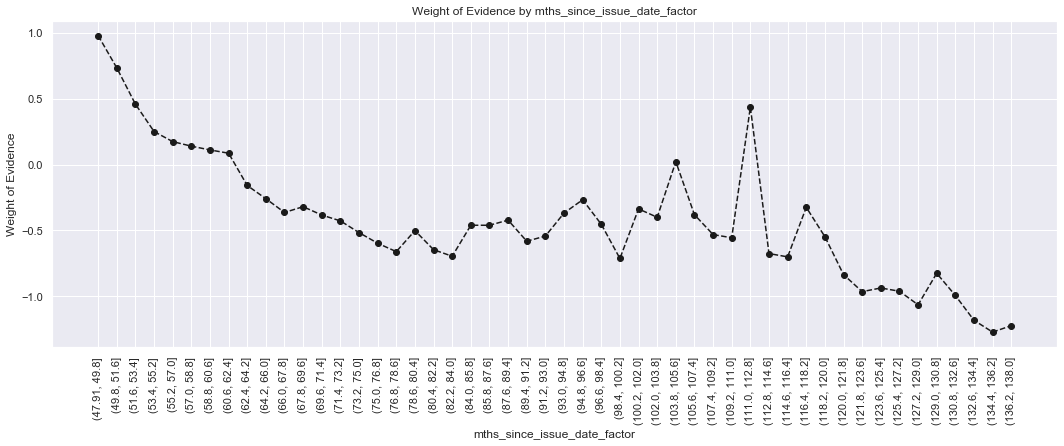

In [652]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
# We have to rotate the labels because we cannot read them otherwise.

In [ ]:
#the first 3 interval categories have a ralatively high WoE compared to others and a higher nbr of obs as well
#we will consider them as 3 separate categories respectively 
#[47.91, 49.8] or < 50 
#[49.8, 51.6] or [50-51]
#[51.6, 53.4] or [52-53]

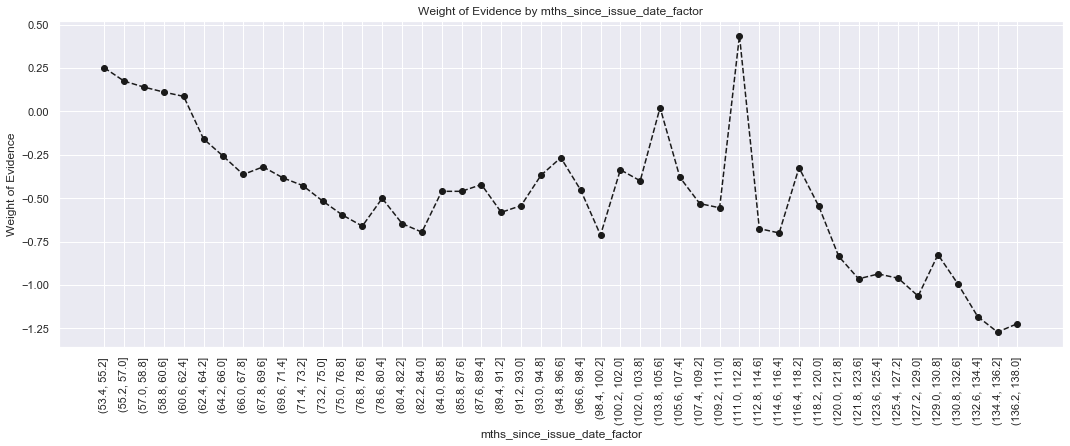

In [653]:
# We plot the weight of evidence values.
plot_by_woe(df_temp.iloc[3: , : ], 90)
#similarly, the 1st 4 interval categories have a higher WoE compare to other categories.
#we can combine them together
#[53.4, 55.2],[55.2, 57.0],[57.0, 58.8],[58.8, 60.6] to [53, 60]

#[60.6, 62.4],[62.4, 64.2] can be combined to [61, 64]

#[64.2, 66.0],[66.0, 67.8], [67.8, 69.6], [69.6, 71.4],[71.4, 73.2], [73.2, 75.0],[75.0, 76.8] to [65, 76] 

#From the graph we can see that from the interval [76.8, 78.6] to [136.2, 138.0] the WoE is not constant,
#By checking the nber of obs, we note that all the intervels account for a low proportion of the sample
#so we can combine them into one category
#But from the interval [76.8, 78.6] to [94.8, 96.6], the these categories have a higher nber of obs compared to the rest of intervals
#We combine the interval [76.8, 78.6] to [94.8, 96.6] into one category and from [96.6, 98.4] to [136.2, 138.0] into another interval
#[77, 96]
# > 96

In [654]:
# We create the following categories:
# < 50, 50 - 51, 52 - 53, 54 - 60, 61 - 64, 65 - 76, 77 - 96, > 96.
#Range function the lower bond of the interval is included and the higher excluded.
df_inputs_prep['mths_since_issue_date:<50'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(50)), 1, 0)
df_inputs_prep['mths_since_issue_date:50-51'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(50, 52)), 1, 0)
df_inputs_prep['mths_since_issue_date:52-53'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(52, 54)), 1, 0)
df_inputs_prep['mths_since_issue_date:54-60'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(54, 61)), 1, 0)
df_inputs_prep['mths_since_issue_date:61-64'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(61, 65)), 1, 0)
df_inputs_prep['mths_since_issue_date:65-76'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(65, 77)), 1, 0)
df_inputs_prep['mths_since_issue_date:77-96'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(77, 97)), 1, 0)
df_inputs_prep['mths_since_issue_date:>96'] = np.where(df_inputs_prep['mths_since_issue_date'].isin(range(97, int(df_inputs_prep['mths_since_issue_date'].max()))), 1, 0)

In [655]:
# int_rate
df_inputs_prep['int_rate_factor'] = pd.cut(df_inputs_prep['int_rate'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.

In [656]:
df_temp = woe_ordered_continuous(df_inputs_prep, 'int_rate_factor', df_targets_prep)
# We calculate WoE.
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",170,0.982353,0.001823,167.0,3.0,0.001979,0.000338,1.766768,NaN,NaN,0.359904
1,"(5.833, 6.246]",2125,0.980706,0.022786,2084.0,41.0,0.024696,0.004622,1.675858,0.001647,0.090909,0.359904
2,"(6.246, 6.658]",1930,0.980829,0.020695,1893.0,37.0,0.022433,0.004171,1.682386,0.000123,0.006528,0.359904
3,"(6.658, 7.071]",460,0.963043,0.004933,443.0,17.0,0.005250,0.001916,1.007742,0.017786,0.674644,0.359904
4,"(7.071, 7.484]",772,0.977979,0.008278,755.0,17.0,0.008947,0.001916,1.540890,0.014936,0.533148,0.359904
5,"(7.484, 7.897]",3131,0.966145,0.033574,3025.0,106.0,0.035847,0.011949,1.098613,0.011834,0.442277,0.359904
6,"(7.897, 8.31]",2403,0.965876,0.025768,2321.0,82.0,0.027505,0.009244,1.090420,0.000269,0.008193,0.359904
7,"(8.31, 8.722]",1635,0.971865,0.017532,1589.0,46.0,0.018830,0.005185,1.289605,0.005989,0.199185,0.359904
8,"(8.722, 9.135]",2371,0.949388,0.025424,2251.0,120.0,0.026675,0.013527,0.679024,0.022477,0.610581,0.359904
9,"(9.135, 9.548]",1694,0.974616,0.018165,1651.0,43.0,0.019565,0.004847,1.395322,0.025228,0.716298,0.359904


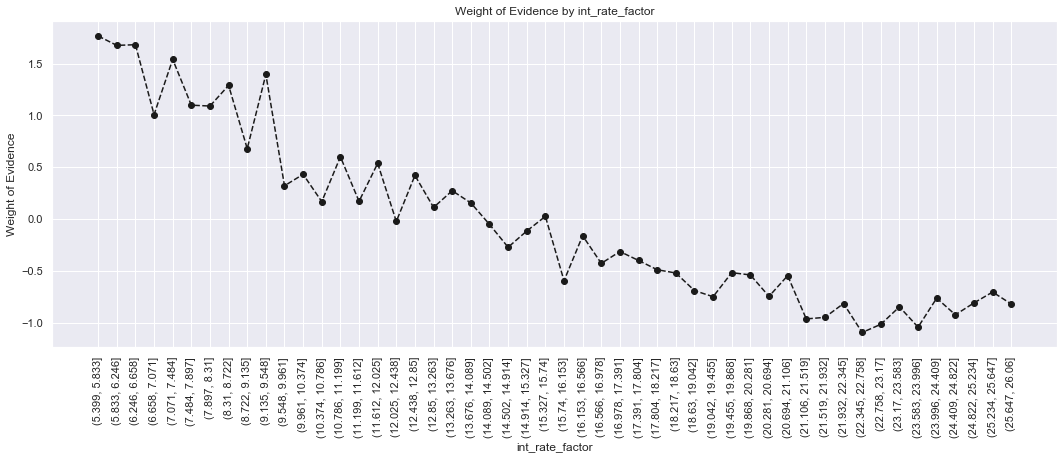

In [657]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
#the graph indicates a monotonic relationship between IR and WoE. the higher the IR, the lower is the 
#-WoE and consequently the PD
#The 1st 10 categories from the interval[5.399, 5.833] to [9.135, 9.548]have a high and unstable WoE but low nbr of obs.
#-we can combine them into one interval category [<= 9.548]
#Similarly we combine the interval from [9.548, 9.961] to [11.612, 12.025] can be combined into > 9.548 and =< 12.025
#the interval[12.025, 12.438] to [15.327, 15.74] can be combined into an interval > 12.025 and =< 15.74
#the interval [15.74, 16.153] and [19.868, 20.281] can be combined into > 15.74 and =< 20.281
#The last category > 20.281

In [658]:
# '< 9.548', '9.548 - 12.025', '12.025 - 15.74', '15.74 - 20.281', '> 20.281'
# <=9.548, >9.548 =< 12.025, >12.025 =< 15.74, >15.74=<20.281, >20.281
#Ref cat=int_rate:>20.281
df_inputs_prep['int_rate:<9.548'] = np.where((df_inputs_prep['int_rate'] <= 9.548), 1, 0)
df_inputs_prep['int_rate:9.548-12.025'] = np.where((df_inputs_prep['int_rate'] > 9.548) & (df_inputs_prep['int_rate'] <= 12.025), 1, 0)
df_inputs_prep['int_rate:12.025-15.74'] = np.where((df_inputs_prep['int_rate'] > 12.025) & (df_inputs_prep['int_rate'] <= 15.74), 1, 0)
df_inputs_prep['int_rate:15.74-20.281'] = np.where((df_inputs_prep['int_rate'] > 15.74) & (df_inputs_prep['int_rate'] <= 20.281), 1, 0)
df_inputs_prep['int_rate:>20.281'] = np.where((df_inputs_prep['int_rate'] > 20.281), 1, 0)

In [659]:
# funded_amnt
df_inputs_prep['funded_amnt_factor'] = pd.cut(df_inputs_prep['funded_amnt'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'funded_amnt_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",265,0.898113,0.002842,238.0,27.0,0.002820,0.003044,-0.076180,NaN,NaN,0.023247
1,"(1190.0, 1880.0]",731,0.915185,0.007839,669.0,62.0,0.007928,0.006989,0.126036,0.017071,0.202216,0.023247
2,"(1880.0, 2570.0]",1487,0.902488,0.015945,1342.0,145.0,0.015903,0.016345,-0.027431,0.012696,0.153467,0.023247
3,"(2570.0, 3260.0]",1817,0.886076,0.019484,1610.0,207.0,0.019079,0.023334,-0.201343,0.016412,0.173912,0.023247
4,"(3260.0, 3950.0]",1213,0.900247,0.013007,1092.0,121.0,0.012941,0.013640,-0.052638,0.014171,0.148705,0.023247
5,"(3950.0, 4640.0]",2274,0.905893,0.024384,2060.0,214.0,0.024412,0.024124,0.011871,0.005645,0.064510,0.023247
6,"(4640.0, 5330.0]",4065,0.904797,0.043589,3678.0,387.0,0.043585,0.043625,-0.000914,0.001096,0.012786,0.023247
7,"(5330.0, 6020.0]",4235,0.919008,0.045412,3892.0,343.0,0.046121,0.038665,0.176334,0.014211,0.177248,0.023247
8,"(6020.0, 6710.0]",1710,0.887719,0.018336,1518.0,192.0,0.017989,0.021644,-0.184960,0.031289,0.361294,0.023247
9,"(6710.0, 7400.0]",2891,0.906953,0.031000,2622.0,269.0,0.031072,0.030324,0.024367,0.019233,0.209328,0.023247


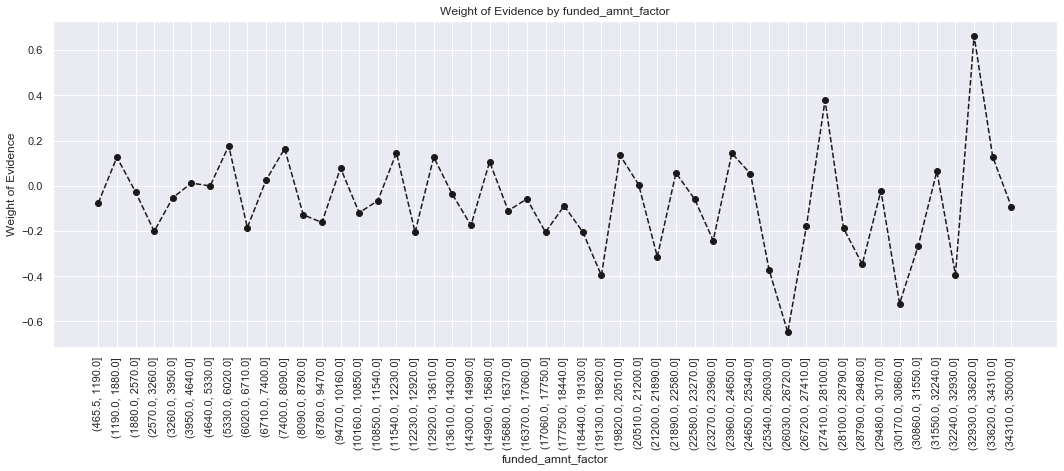

In [660]:
#Not include
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
#the WoE of the different categories varies too much, this is an evidence that there is no relationship
#between the funded amount and the dependent variable. consequently we will not include this variable 

In [661]:
# mths_since_earliest_cr_line
df_inputs_prep['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_prep['mths_since_earliest_cr_line'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'mths_since_earliest_cr_line_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.599, 11.98]",5,0.800000,0.000054,4.0,1.0,0.000047,0.000113,-0.866320,NaN,NaN,0.020925
1,"(11.98, 23.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020925
2,"(23.96, 35.94]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020925
3,"(35.94, 47.92]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020925
4,"(47.92, 59.9]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020925
5,"(59.9, 71.88]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020925
6,"(71.88, 83.86]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.020925
7,"(83.86, 95.84]",226,0.933628,0.002423,211.0,15.0,0.002500,0.001691,0.391194,NaN,NaN,0.020925
8,"(95.84, 107.82]",553,0.916817,0.005930,507.0,46.0,0.006008,0.005185,0.147256,0.016811,0.243938,0.020925
9,"(107.82, 119.8]",686,0.880466,0.007356,604.0,82.0,0.007158,0.009244,-0.255759,0.036351,0.403015,0.020925


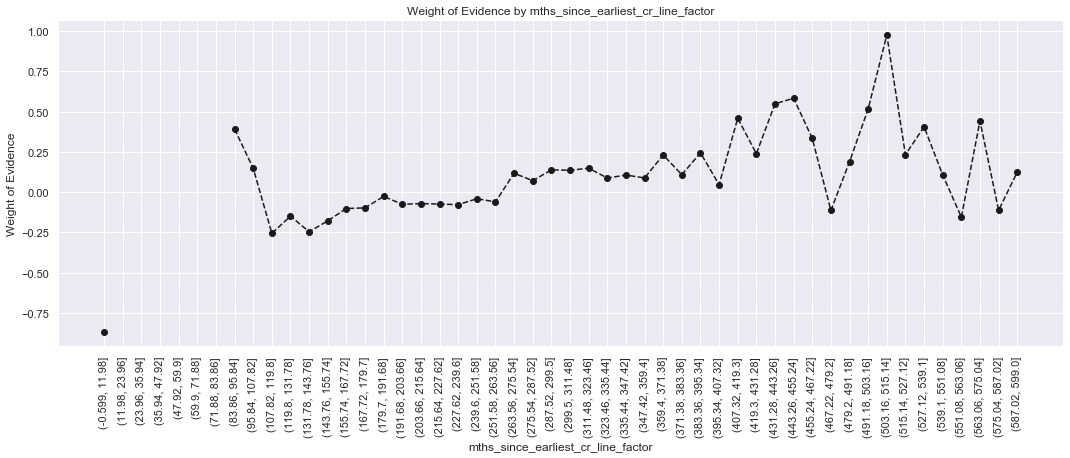

In [662]:
plot_by_woe(df_temp, 90)
# We plot the WoE values
#The 1st seven categories have no values

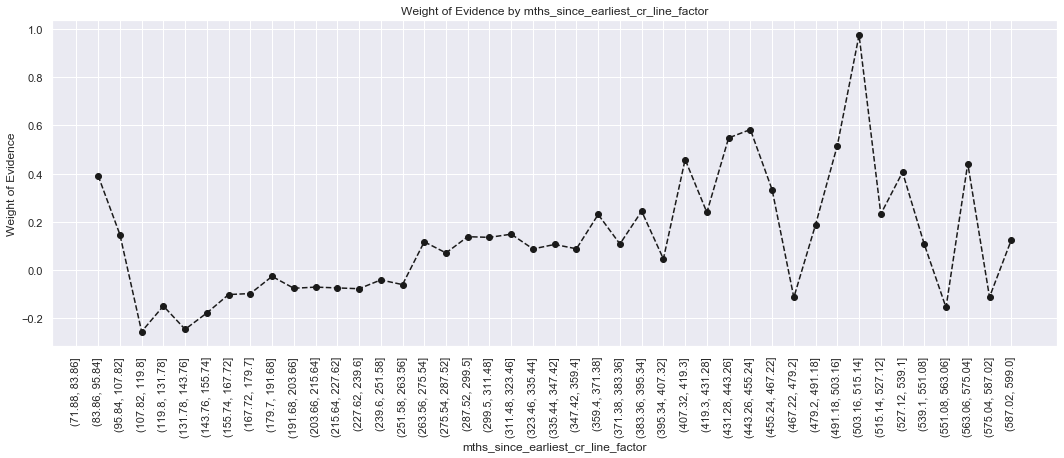

In [663]:
plot_by_woe(df_temp.iloc[6: , : ], 90)
# We plot the weight of evidence values.    
#We 1st interval is from [-0.599, 11.98] to [131.78, 143.76] we can combine them into one intarval =< 131.78
#the 2nd interval category from [143.76, 155.74] to [155.74, 167.72] can be combine into [144-167]
#The 3rd interval from [167.72, 179.7] to [227.62, 239.6] can be combine into [168-239]
#[239.6, 251.58] to [263.56, 275.54] combined to [240-275]
#[275.54, 287.52] to [359.4, 371.38] combined to [276-371]
#[371.38, 383.36] to [587.02, 599.0] >= 371

In [664]:
# We create the following categories:
# < 144, 144 - 167, 168 - 239, 240 - 275, 276 - 371, > 371
df_inputs_prep['mths_since_earliest_cr_line:<144'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(144)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:144-167'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(144, 168)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:168-239'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(168, 240)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:240-275'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(240, 276)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:276-371'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(276, 372)), 1, 0)
df_inputs_prep['mths_since_earliest_cr_line:>371'] = np.where(df_inputs_prep['mths_since_earliest_cr_line'].isin(range(372, int(df_inputs_prep['mths_since_earliest_cr_line'].max()))), 1, 0)

`Fine classing the variable equals to cut it into categories`

In [665]:
# delinq_2yrs
df_temp = woe_ordered_continuous(df_inputs_prep, 'delinq_2yrs', df_targets_prep)
# We calculate weight of evidence.
df_temp

,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,76512,0.904799,0.820442,69228.0,7284.0,0.820373,0.821102,-0.000889,NaN,NaN,inf
1,1.0,11189,0.903030,0.119980,10104.0,1085.0,0.119736,0.122309,-0.021263,0.001769,0.020374,inf
2,2.0,3309,0.910245,0.035483,3012.0,297.0,0.035693,0.033480,0.064013,0.007215,0.085276,inf
3,3.0,1203,0.907731,0.012900,1092.0,111.0,0.012941,0.012513,0.033622,0.002514,0.030391,inf
4,4.0,460,0.921739,0.004933,424.0,36.0,0.005025,0.004058,0.213601,0.014008,0.179979,inf
5,5.0,284,0.887324,0.003045,252.0,32.0,0.002986,0.003607,-0.188921,0.034415,0.402521,inf
6,6.0,140,0.921429,0.001501,129.0,11.0,0.001529,0.001240,0.209303,0.034105,0.398224,inf
7,7.0,62,0.887097,0.000665,55.0,7.0,0.000652,0.000789,-0.191191,0.034332,0.400494,inf
8,8.0,31,0.870968,0.000332,27.0,4.0,0.000320,0.000451,-0.343071,0.016129,0.151881,inf
9,9.0,27,1.000000,0.000290,27.0,0.0,0.000320,0.000000,inf,0.129032,inf,inf


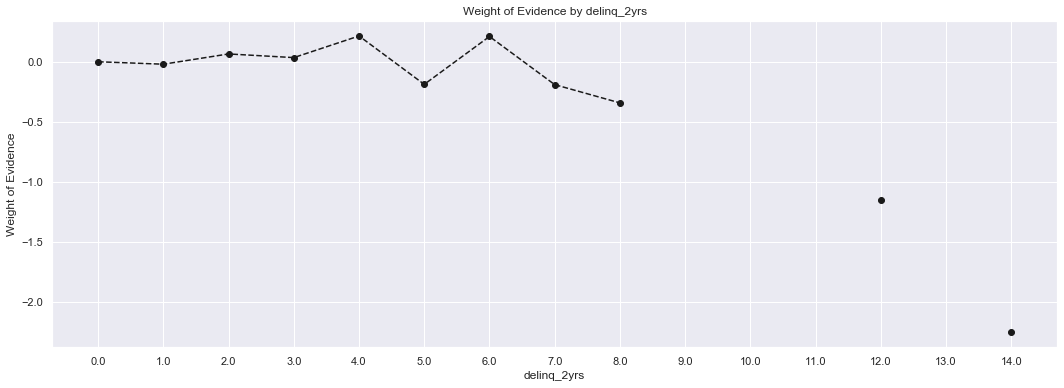

In [666]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

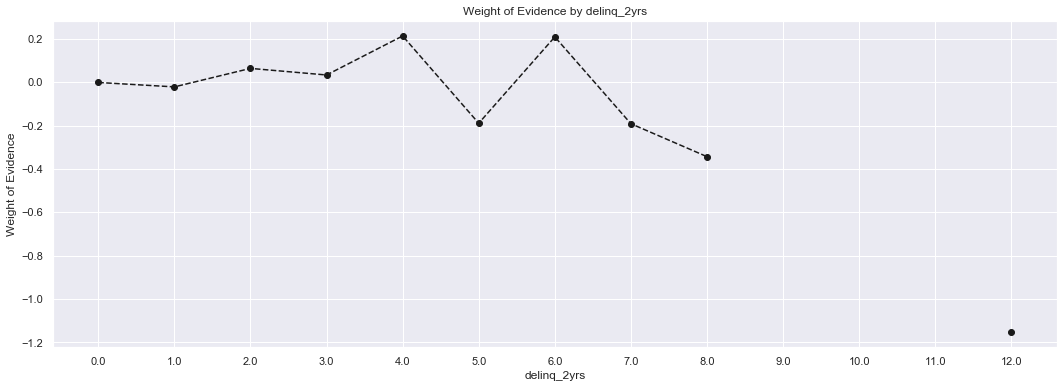

In [667]:
plot_by_woe(df_temp.iloc[0:14,:])

In [668]:
# Categories: 0, 1-3, >=4
df_inputs_prep['delinq_2yrs:0'] = np.where((df_inputs_prep['delinq_2yrs'] == 0), 1, 0)
df_inputs_prep['delinq_2yrs:1-3'] = np.where((df_inputs_prep['delinq_2yrs'] >= 1) & (df_inputs_prep['delinq_2yrs'] <= 3), 1, 0)
df_inputs_prep['delinq_2yrs:>=4'] = np.where((df_inputs_prep['delinq_2yrs'] >= 9), 1, 0)

In [669]:
# inq_last_6mths
df_temp = woe_ordered_continuous(df_inputs_prep, 'inq_last_6mths', df_targets_prep)
# We calculate weight of evidence.
df_temp

,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,48515,0.921282,0.520229,44696.0,3819.0,0.529661,0.430504,0.207281,NaN,NaN,inf
1,1.0,25721,0.899382,0.275808,23133.0,2588.0,0.274133,0.291737,-0.062239,0.021900,0.269521,inf
2,2.0,11664,0.879458,0.125074,10258.0,1406.0,0.121560,0.158494,-0.265305,0.019924,0.203066,inf
3,3.0,5049,0.857596,0.054141,4330.0,719.0,0.051312,0.081051,-0.457153,0.021863,0.191848,inf
4,4.0,1438,0.869263,0.015420,1250.0,188.0,0.014813,0.021193,-0.358157,0.011667,0.098995,inf
5,5.0,525,0.845714,0.005630,444.0,81.0,0.005262,0.009131,-0.551239,0.023549,0.193081,inf
6,6.0,253,0.841897,0.002713,213.0,40.0,0.002524,0.004509,-0.580201,0.003817,0.028963,inf
7,7.0,39,0.692308,0.000418,27.0,12.0,0.000320,0.001353,-1.441684,0.149590,0.861482,inf
8,8.0,24,0.750000,0.000257,18.0,6.0,0.000213,0.000676,-1.154002,0.057692,0.287682,inf
9,9.0,6,0.666667,0.000064,4.0,2.0,0.000047,0.000225,-1.559467,0.083333,0.405465,inf


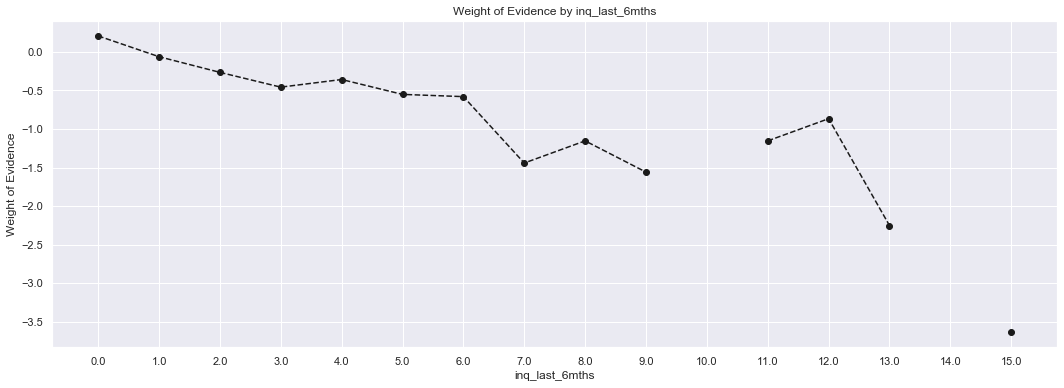

In [670]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [671]:
# Categories: 0, 1 - 2, 3 - 5, > 5
df_inputs_prep['inq_last_6mths:0'] = np.where((df_inputs_prep['inq_last_6mths'] == 0), 1, 0)
df_inputs_prep['inq_last_6mths:1-2'] = np.where((df_inputs_prep['inq_last_6mths'] >= 1) & (df_inputs_prep['inq_last_6mths'] <= 2), 1, 0)
df_inputs_prep['inq_last_6mths:3-5'] = np.where((df_inputs_prep['inq_last_6mths'] >= 3) & (df_inputs_prep['inq_last_6mths'] <= 5), 1, 0)
df_inputs_prep['inq_last_6mths:>5'] = np.where((df_inputs_prep['inq_last_6mths'] > 5), 1, 0)

In [672]:
# open_acc
df_temp = woe_ordered_continuous(df_inputs_prep, 'open_acc', df_targets_prep)
# We calculate weight of evidence.
df_temp

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,5,0.800000,0.000054,4.0,1.0,0.000047,0.000113,-0.866320,NaN,NaN,inf
1,1.0,37,0.918919,0.000397,34.0,3.0,0.000403,0.000338,0.175134,0.118919,1.041454,inf
2,2.0,347,0.841499,0.003721,292.0,55.0,0.003460,0.006200,-0.583193,0.077420,0.758328,inf
3,3.0,1106,0.870705,0.011860,963.0,143.0,0.011412,0.016120,-0.345405,0.029207,0.237788,inf
4,4.0,2459,0.901586,0.026368,2217.0,242.0,0.026272,0.027280,-0.037641,0.030881,0.307764,inf
5,5.0,4339,0.899055,0.046527,3901.0,438.0,0.046228,0.049374,-0.065845,0.002531,0.028203,inf
6,6.0,6077,0.907685,0.065164,5516.0,561.0,0.065366,0.063240,0.033073,0.008630,0.098918,inf
7,7.0,7535,0.906967,0.080798,6834.0,701.0,0.080985,0.079022,0.024544,0.000717,0.008530,inf
8,8.0,8495,0.910418,0.091092,7734.0,761.0,0.091650,0.085785,0.066134,0.003450,0.041591,inf
9,9.0,8778,0.906812,0.094127,7960.0,818.0,0.094328,0.092211,0.022708,0.003605,0.043426,inf


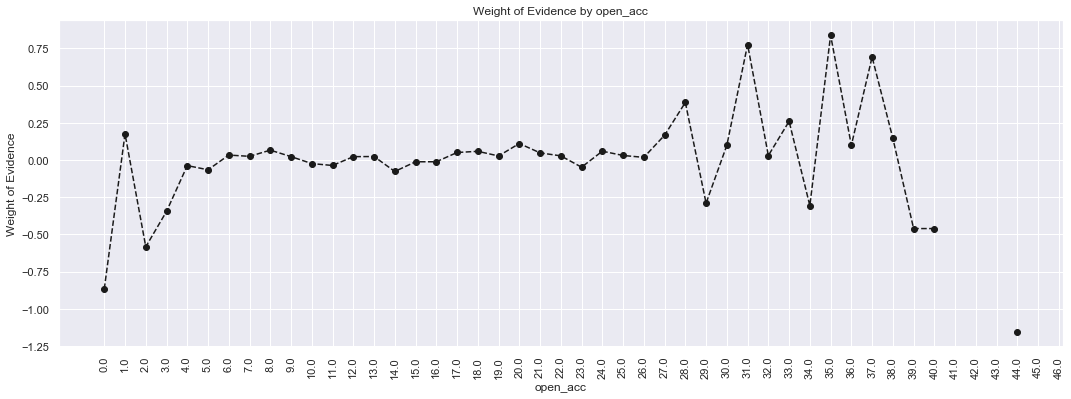

In [673]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

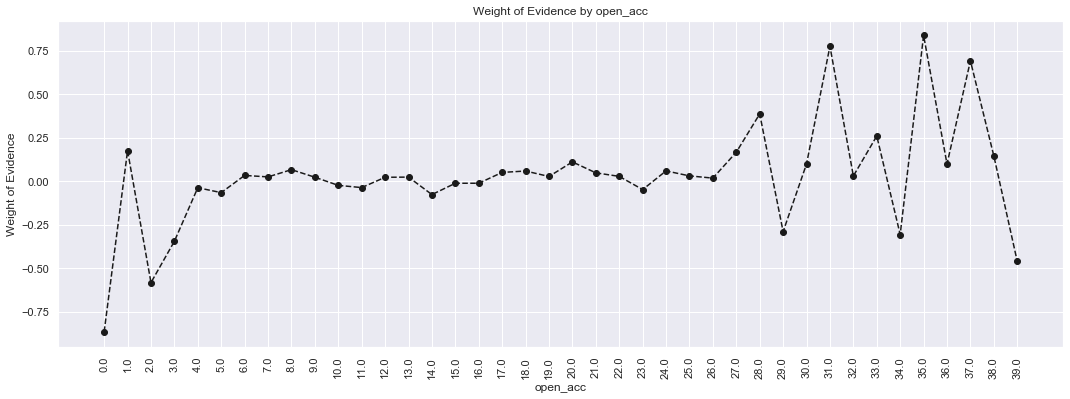

In [674]:
plot_by_woe(df_temp.iloc[ : 40, :], 90)
# We plot the weight of evidence values.

In [675]:
# Categories: '0', '1-3', '4-12', '13-17', '18-22','>22'
df_inputs_prep['open_acc:0'] = np.where((df_inputs_prep['open_acc'] == 0), 1, 0)
df_inputs_prep['open_acc:1-3'] = np.where((df_inputs_prep['open_acc'] >= 1) & (df_inputs_prep['open_acc'] <= 3), 1, 0)
df_inputs_prep['open_acc:4-12'] = np.where((df_inputs_prep['open_acc'] >= 4) & (df_inputs_prep['open_acc'] <= 12), 1, 0)
df_inputs_prep['open_acc:13-17'] = np.where((df_inputs_prep['open_acc'] >= 13) & (df_inputs_prep['open_acc'] <= 17), 1, 0)
df_inputs_prep['open_acc:18-22'] = np.where((df_inputs_prep['open_acc'] >= 18) & (df_inputs_prep['open_acc'] <= 22), 1, 0)
df_inputs_prep['open_acc:>=23'] = np.where((df_inputs_prep['open_acc'] >= 23), 1, 0)

In [676]:
# pub_rec
df_temp = woe_ordered_continuous(df_inputs_prep, 'pub_rec', df_targets_prep)
# We calculate weight of evidence.
df_temp

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,81004,0.903178,0.868610,73161.0,7843.0,0.866980,0.884117,-0.019573,NaN,NaN,inf
1,1.0,10539,0.913749,0.113010,9630.0,909.0,0.114118,0.102469,0.107679,0.010571,0.127252,inf
2,2.0,1144,0.924825,0.012267,1058.0,86.0,0.012538,0.009695,0.257174,0.011076,0.149495,inf
3,3.0,346,0.927746,0.003710,321.0,25.0,0.003804,0.002818,0.299951,0.002920,0.042777,inf
4,4.0,106,0.962264,0.001137,102.0,4.0,0.001209,0.000451,0.986064,0.034518,0.686113,inf
5,5.0,63,0.968254,0.000676,61.0,2.0,0.000723,0.000225,1.165113,0.005990,0.179048,inf
6,6.0,31,0.935484,0.000332,29.0,2.0,0.000344,0.000225,0.421535,0.032770,0.743578,inf
7,7.0,6,1.000000,0.000064,6.0,0.0,0.000071,0.000000,inf,0.064516,inf,inf
8,8.0,7,1.000000,0.000075,7.0,0.0,0.000083,0.000000,inf,0.000000,NaN,inf
9,9.0,4,1.000000,0.000043,4.0,0.0,0.000047,0.000000,inf,0.000000,NaN,inf


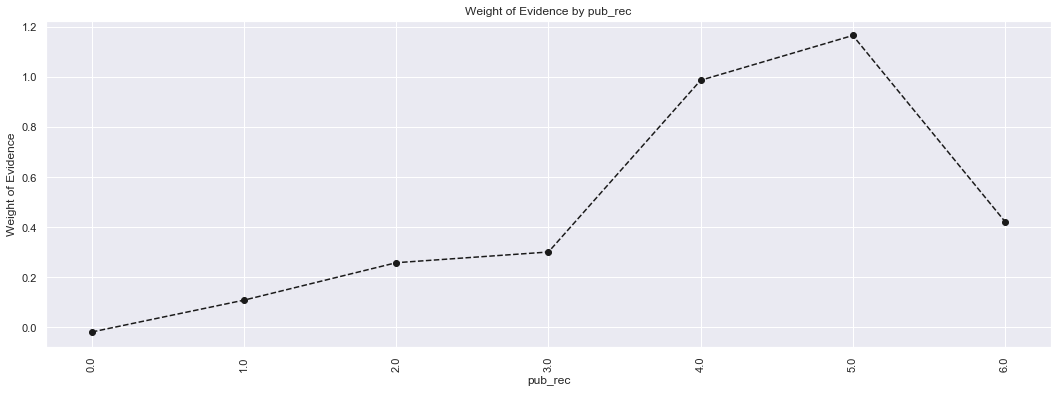

In [677]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [134]:
# Categories '0-2', '>=3'
#df_inputs_prep['pub_rec:0-2'] = np.where((df_inputs_prep['pub_rec'] >= 0) & (df_inputs_prep['pub_rec'] <= 2), 1, 0)
#df_inputs_prep['pub_rec:>=3'] = np.where((df_inputs_prep['pub_rec'] >= 3), 1, 0)

In [678]:
# Categories '0','>=1'
df_inputs_prep['pub_rec:0'] = np.where((df_inputs_prep['pub_rec'] == 0), 1, 0)
df_inputs_prep['pub_rec:>=1'] = np.where((df_inputs_prep['pub_rec'] >= 1), 1, 0)

In [679]:
# total_acc
df_inputs_prep['total_acc_factor'] = pd.cut(df_inputs_prep['total_acc'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'total_acc_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.119, 2.38]",20,0.700000,0.000214,14.0,6.0,0.000166,0.000676,-1.405316,NaN,NaN,inf
1,"(2.38, 4.76]",413,0.835351,0.004429,345.0,68.0,0.004088,0.007665,-0.628577,0.135351,0.776739,inf
2,"(4.76, 7.14]",2110,0.871090,0.022626,1838.0,272.0,0.021781,0.030662,-0.341983,0.035739,0.286595,inf
3,"(7.14, 9.52]",2770,0.886282,0.029703,2455.0,315.0,0.029093,0.035509,-0.199305,0.015192,0.142678,inf
4,"(9.52, 11.9]",3874,0.907073,0.041541,3514.0,360.0,0.041642,0.040582,0.025792,0.020791,0.225097,inf
5,"(11.9, 14.28]",7800,0.894487,0.083640,6977.0,823.0,0.082680,0.092774,-0.115196,0.012586,0.140988,inf
6,"(14.28, 16.66]",6122,0.907220,0.065647,5554.0,568.0,0.065817,0.064029,0.027538,0.012733,0.142734,inf
7,"(16.66, 19.04]",9962,0.901124,0.106823,8977.0,985.0,0.106380,0.111036,-0.042835,0.006096,0.070373,inf
8,"(19.04, 21.42]",6891,0.902917,0.073893,6222.0,669.0,0.073733,0.075414,-0.022551,0.001793,0.020283,inf
9,"(21.42, 23.8]",6866,0.904020,0.073625,6207.0,659.0,0.073555,0.074287,-0.009905,0.001103,0.012647,inf


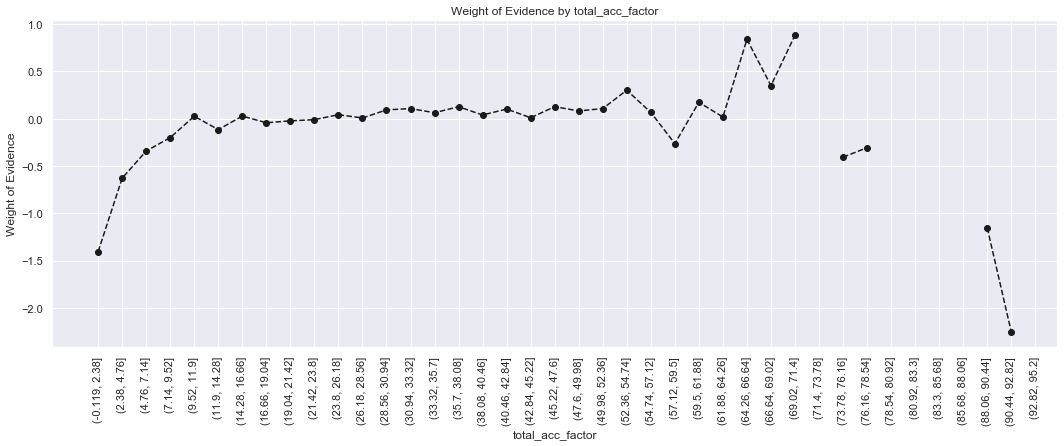

In [680]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.

In [302]:
#df_inputs_prep.drop(['total_acc:<15','total_acc:16-25', 'total_acc:26-38', 'total_acc:>=39'], axis=1, inplace= True)

In [681]:
# Categories: '<16', '15-25', '26-38','>39'
df_inputs_prep['total_acc:Missing'] = np.where((df_inputs_prep['total_acc'].isnull()), 1, 0)
df_inputs_prep['total_acc:<15'] = np.where((df_inputs_prep['total_acc'] < 16), 1, 0)
df_inputs_prep['total_acc:16-25'] = np.where((df_inputs_prep['total_acc'] >= 16) & (df_inputs_prep['total_acc'] <= 25), 1, 0)
df_inputs_prep['total_acc:26-38'] = np.where((df_inputs_prep['total_acc'] >= 26) & (df_inputs_prep['total_acc'] <= 38), 1, 0)
df_inputs_prep['total_acc:>=39'] = np.where((df_inputs_prep['total_acc'] >= 39), 1, 0)

In [682]:
# acc_now_delinq
df_temp = woe_ordered_continuous(df_inputs_prep, 'acc_now_delinq', df_targets_prep)
# We calculate weight of evidence.
df_temp

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,92912,0.904856,0.996301,84072.0,8840.0,0.996279,0.996505,-0.000227,NaN,NaN,inf
1,1.0,325,0.907692,0.003485,295.0,30.0,0.003496,0.003382,0.033164,0.002836,0.033391,inf
2,2.0,16,0.937500,0.000172,15.0,1.0,0.000178,0.000113,0.455436,0.029808,0.422272,inf
3,3.0,1,1.000000,0.000011,1.0,0.0,0.000012,0.000000,inf,0.062500,inf,inf
4,4.0,2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf
5,5.0,1,1.000000,0.000011,1.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf


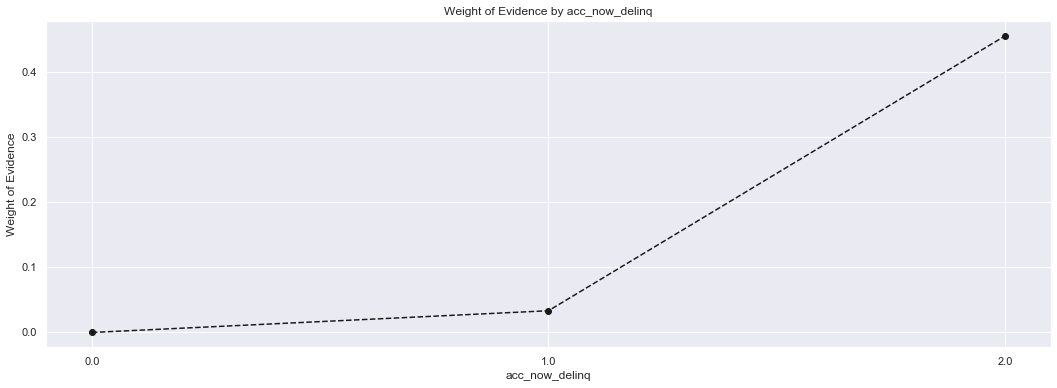

In [683]:
plot_by_woe(df_temp)
# We plot the weight of evidence values.

In [684]:
# Categories: '0', '>=1'
df_inputs_prep['acc_now_delinq:0'] = np.where((df_inputs_prep['acc_now_delinq'] == 0), 1, 0)
df_inputs_prep['acc_now_delinq:>=1'] = np.where((df_inputs_prep['acc_now_delinq'] >= 1), 1, 0)

In [685]:
# total_rev_hi_lim
df_inputs_prep['total_rev_hi_lim_factor'] = pd.cut(df_inputs_prep['total_rev_hi_lim'], 2000)
# Here we do fine-classing: using the 'cut' method, we split the variable into 2000 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'total_rev_hi_lim_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,total_rev_hi_lim_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-9999.999, 5000.0]",4809,0.868372,0.051567,4176.0,633.0,0.049487,0.071356,-0.365975,NaN,NaN,inf
1,"(5000.0, 9999.999]",13254,0.891580,0.142123,11817.0,1437.0,0.140035,0.161989,-0.145632,0.023208,0.220343,inf
2,"(9999.999, 14999.998]",14807,0.892888,0.158776,13221.0,1586.0,0.156673,0.178785,-0.132023,0.001309,0.013610,inf
3,"(14999.998, 19999.998]",12818,0.891559,0.137448,11428.0,1390.0,0.135425,0.156690,-0.145851,0.001330,0.013829,inf
4,"(19999.998, 24999.997]",10488,0.907704,0.112463,9520.0,968.0,0.112815,0.109120,0.033304,0.016145,0.179155,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,"(9974999.002, 9979999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1996,"(9979999.002, 9984999.002]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1997,"(9984999.002, 9989999.001]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
1998,"(9989999.001, 9994999.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


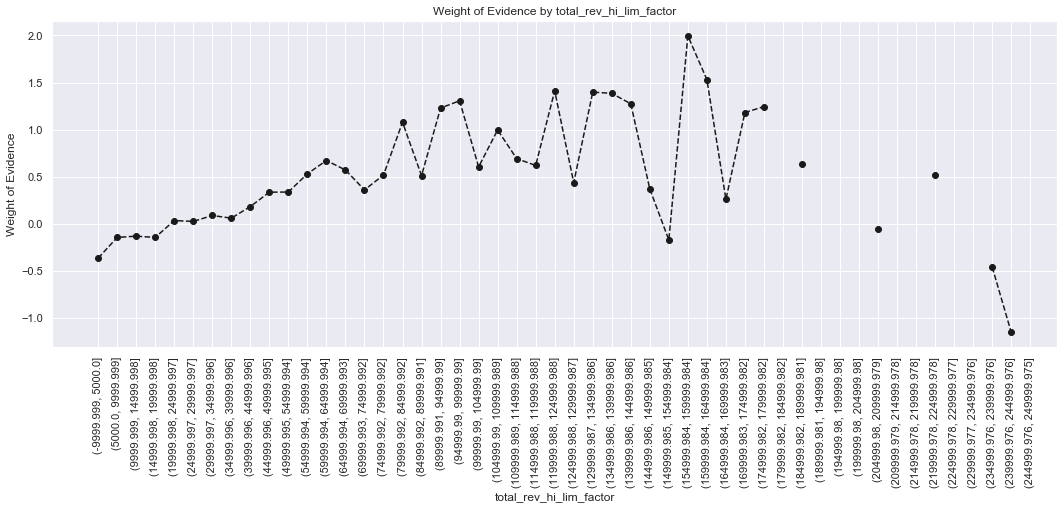

In [686]:
plot_by_woe(df_temp.iloc[: 50, : ], 90)
# We plot the weight of evidence values.

In [687]:
# Categories
# '<=5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K-55K', '55K-95K', '>95K'
df_inputs_prep['total_rev_hi_lim:<=5K'] = np.where((df_inputs_prep['total_rev_hi_lim'] <= 5000), 1, 0)
df_inputs_prep['total_rev_hi_lim:5K-10K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 5000) & (df_inputs_prep['total_rev_hi_lim'] <= 10000), 1, 0)
df_inputs_prep['total_rev_hi_lim:10K-20K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 10000) & (df_inputs_prep['total_rev_hi_lim'] <= 20000), 1, 0)
df_inputs_prep['total_rev_hi_lim:20K-30K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 20000) & (df_inputs_prep['total_rev_hi_lim'] <= 30000), 1, 0)
df_inputs_prep['total_rev_hi_lim:30K-40K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 30000) & (df_inputs_prep['total_rev_hi_lim'] <= 40000), 1, 0)
df_inputs_prep['total_rev_hi_lim:40K-55K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 40000) & (df_inputs_prep['total_rev_hi_lim'] <= 55000), 1, 0)
df_inputs_prep['total_rev_hi_lim:55K-95K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 55000) & (df_inputs_prep['total_rev_hi_lim'] <= 95000), 1, 0)
df_inputs_prep['total_rev_hi_lim:>95K'] = np.where((df_inputs_prep['total_rev_hi_lim'] > 95000), 1, 0)

In [688]:
# installment
df_inputs_prep['installment_factor'] = pd.cut(df_inputs_prep['installment'], 50)
# Here we do fine-classing: using the 'cut' method, we split the variable into 50 categories by its values.
df_temp = woe_ordered_continuous(df_inputs_prep, 'installment_factor', df_targets_prep)
# We calculate weight of evidence.
df_temp

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",413,0.895884,0.004429,370.0,43.0,0.004385,0.004847,-0.100311,NaN,NaN,0.020166
1,"(43.556, 71.443]",1173,0.913896,0.012578,1072.0,101.0,0.012704,0.011385,0.109547,0.018012,0.209858,0.020166
2,"(71.443, 99.329]",1707,0.890451,0.018304,1520.0,187.0,0.018012,0.021080,-0.157257,0.023445,0.266804,0.020166
3,"(99.329, 127.216]",2314,0.898876,0.024813,2080.0,234.0,0.024649,0.026378,-0.067812,0.008425,0.089445,0.020166
4,"(127.216, 155.102]",2541,0.907517,0.027247,2306.0,235.0,0.027327,0.026491,0.031070,0.008640,0.098882,0.020166
5,"(155.102, 182.988]",4248,0.909605,0.045552,3864.0,384.0,0.045790,0.043287,0.056202,0.002088,0.025131,0.020166
6,"(182.988, 210.875]",4257,0.913319,0.045648,3888.0,369.0,0.046074,0.041596,0.102240,0.003715,0.046038,0.020166
7,"(210.875, 238.761]",3746,0.909770,0.040169,3408.0,338.0,0.040386,0.038102,0.058221,0.003549,0.044019,0.020166
8,"(238.761, 266.648]",4740,0.919409,0.050827,4358.0,382.0,0.051644,0.043062,0.181734,0.009639,0.123513,0.020166
9,"(266.648, 294.534]",5013,0.906842,0.053755,4546.0,467.0,0.053871,0.052643,0.023060,0.012567,0.158674,0.020166


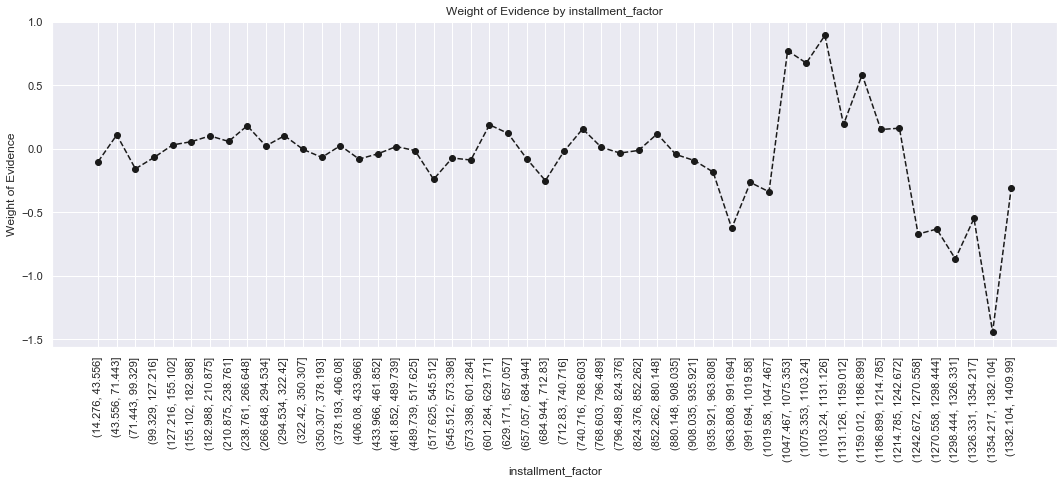

In [689]:
plot_by_woe(df_temp, 90)
# We plot the weight of evidence values.
#We won't be using this variable

In [690]:
#annual income
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep, 'annual_inc_factor', df_targets_prep)
df_temp
#Based on the table, we observe that the data are largely unbalanced. the 1 interval category accounts for more than 95% of nber of obs.
#therefore 50 categories was not enough to find classes of the variable, we have to increase the number of categories to 100
#by splitting the variable into more than 50 classes 

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5498.0, 151960.0]",89235,0.903289,0.956872,80605.0,8630.0,0.955194,0.972833,-0.018298,NaN,NaN,inf
1,"(151960.0, 301920.0]",3607,0.939285,0.038678,3388.0,219.0,0.040149,0.024687,0.486309,0.035996,0.504607,inf
2,"(301920.0, 451880.0]",273,0.952381,0.002927,260.0,13.0,0.003081,0.001465,0.743118,0.013096,0.256809,inf
3,"(451880.0, 601840.0]",84,0.940476,0.000901,79.0,5.0,0.000936,0.000564,0.507396,0.011905,0.235722,inf
4,"(601840.0, 751800.0]",21,0.952381,0.000225,20.0,1.0,0.000237,0.000113,0.743118,0.011905,0.235722,inf
5,"(751800.0, 901760.0]",15,0.800000,0.000161,12.0,3.0,0.000142,0.000338,-0.866320,0.152381,1.609438,inf
6,"(901760.0, 1051720.0]",8,1.000000,0.000086,8.0,0.0,0.000095,0.000000,inf,0.200000,inf,inf
7,"(1051720.0, 1201680.0]",7,1.000000,0.000075,7.0,0.0,0.000083,0.000000,inf,0.000000,NaN,inf
8,"(1201680.0, 1351640.0]",1,1.000000,0.000011,1.0,0.0,0.000012,0.000000,inf,0.000000,NaN,inf
9,"(1351640.0, 1501600.0]",2,1.000000,0.000021,2.0,0.0,0.000024,0.000000,inf,0.000000,NaN,inf


In [691]:
df_inputs_prep['annual_inc_factor'] = pd.cut(df_inputs_prep['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_prep, 'annual_inc_factor', df_targets_prep)
df_temp
#still the 1st interval accounts for more 65%  of all obs. if we apply logic, this is kind of expected since we have few peoples with 
#high income and lot of people with low inc.
#perhaps we should segregate people with high income and investigate people with lower income separetly
#As income grows, the nber of obs decreases
#We can create a dummy for people with high inc and for people with lower inc next
#if we set the treshold for people with higher inc at 150785K, the total nber of peoples with high inc will accounts for nearly 4% of nbs obs
#we wil create a category for people with income higher than 150K
#We first investigate people with inc lower or equal to 150K. we will separate and store them in a temporary df 

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5498.0, 76980.0]",61157,0.892833,0.655790,54603.0,6554.0,0.647062,0.738812,-0.132601,NaN,NaN,inf
1,"(76980.0, 151960.0]",28078,0.926063,0.301082,26002.0,2076.0,0.308132,0.234021,0.275117,0.033230,0.407717,inf
2,"(151960.0, 226940.0]",2935,0.938330,0.031472,2754.0,181.0,0.032636,0.020404,0.469699,0.012267,0.194582,inf
3,"(226940.0, 301920.0]",672,0.943452,0.007206,634.0,38.0,0.007513,0.004284,0.561849,0.005122,0.092150,inf
4,"(301920.0, 376900.0]",177,0.954802,0.001898,169.0,8.0,0.002003,0.000902,0.797843,0.011350,0.235994,inf
5,"(376900.0, 451880.0]",96,0.947917,0.001029,91.0,5.0,0.001078,0.000564,0.648808,0.006886,0.149036,inf
6,"(451880.0, 526860.0]",50,0.940000,0.000536,47.0,3.0,0.000557,0.000338,0.498921,0.007917,0.149886,inf
7,"(526860.0, 601840.0]",34,0.941176,0.000365,32.0,2.0,0.000379,0.000225,0.519975,0.001176,0.021053,inf
8,"(601840.0, 676820.0]",12,0.916667,0.000129,11.0,1.0,0.000130,0.000113,0.145281,0.024510,0.374693,inf
9,"(676820.0, 751800.0]",9,1.000000,0.000097,9.0,0.0,0.000107,0.000000,inf,0.083333,inf,inf


In [692]:
#we create a temp var for people with inc lower or equal to 150K 
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep['annual_inc'] <= 150000, : ]

In [693]:
df_inputs_prep_temp['annual_inc_factor'] = pd.cut(df_inputs_prep_temp['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'annual_inc_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1852.0, 4960.0]",9,0.777778,0.000101,7.0,2.0,0.000087,0.000232,-0.981607,NaN,NaN,0.05802
1,"(4960.0, 7920.0]",11,0.818182,0.000123,9.0,2.0,0.000112,0.000232,-0.730293,0.040404,0.251314,0.05802
2,"(7920.0, 10880.0]",81,0.839506,0.000908,68.0,13.0,0.000844,0.001507,-0.579812,0.021324,0.150481,0.05802
3,"(10880.0, 13840.0]",164,0.847561,0.001839,139.0,25.0,0.001725,0.002898,-0.518772,0.008055,0.061040,0.05802
4,"(13840.0, 16800.0]",367,0.852861,0.004114,313.0,54.0,0.003885,0.006260,-0.477151,0.005300,0.041621,0.05802
5,"(16800.0, 19760.0]",490,0.851020,0.005493,417.0,73.0,0.005175,0.008463,-0.491744,0.001841,0.014592,0.05802
6,"(19760.0, 22720.0]",902,0.869180,0.010112,784.0,118.0,0.009730,0.013680,-0.340646,0.018159,0.151098,0.05802
7,"(22720.0, 25680.0]",1637,0.871717,0.018352,1427.0,210.0,0.017711,0.024345,-0.318148,0.002537,0.022498,0.05802
8,"(25680.0, 28640.0]",1461,0.863107,0.016379,1261.0,200.0,0.015651,0.023186,-0.393027,0.008609,0.074879,0.05802
9,"(28640.0, 31600.0]",2476,0.882068,0.027758,2184.0,292.0,0.027106,0.033851,-0.222211,0.018960,0.170817,0.05802


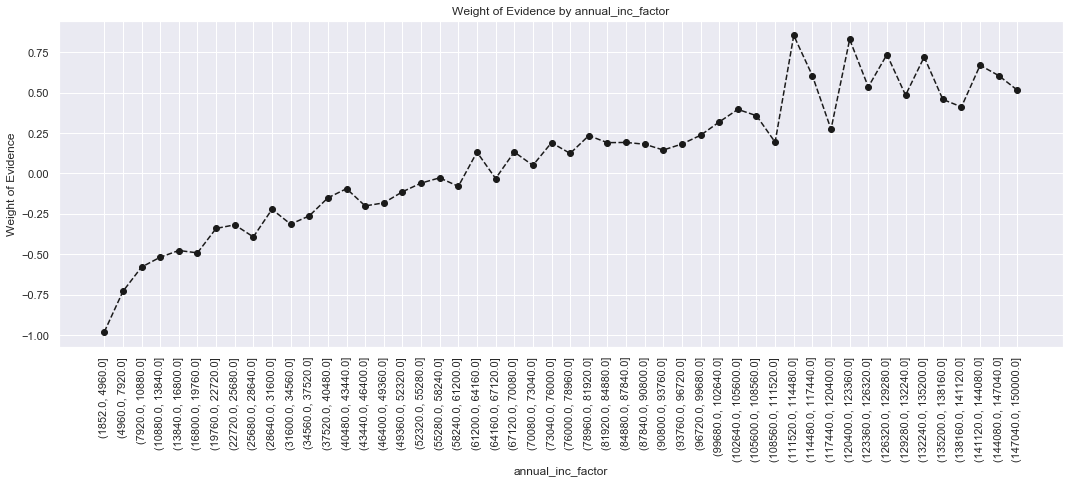

In [694]:
plot_by_woe(df_temp, 90)
# Similar to IR the WoE increases is function of the annual inc
#we can split the data into roughly equal interval

In [695]:
df_inputs_prep['annual_inc:<20K'] = np.where((df_inputs_prep['annual_inc'] <= 20000), 1, 0)
df_inputs_prep['annual_inc:20K-30K'] = np.where((df_inputs_prep['annual_inc'] > 20000) & (df_inputs_prep['annual_inc'] <= 30000), 1, 0)
df_inputs_prep['annual_inc:30K-40K'] = np.where((df_inputs_prep['annual_inc'] > 30000) & (df_inputs_prep['annual_inc'] <= 40000), 1, 0)
df_inputs_prep['annual_inc:40K-50K'] = np.where((df_inputs_prep['annual_inc'] > 40000) & (df_inputs_prep['annual_inc'] <= 50000), 1, 0)
df_inputs_prep['annual_inc:50K-60K'] = np.where((df_inputs_prep['annual_inc'] > 50000) & (df_inputs_prep['annual_inc'] <= 60000), 1, 0)
df_inputs_prep['annual_inc:60K-70K'] = np.where((df_inputs_prep['annual_inc'] > 60000) & (df_inputs_prep['annual_inc'] <= 70000), 1, 0)
df_inputs_prep['annual_inc:70K-80K'] = np.where((df_inputs_prep['annual_inc'] > 70000) & (df_inputs_prep['annual_inc'] <= 80000), 1, 0)
df_inputs_prep['annual_inc:80K-90K'] = np.where((df_inputs_prep['annual_inc'] > 80000) & (df_inputs_prep['annual_inc'] <= 90000), 1, 0)
df_inputs_prep['annual_inc:90K-100K'] = np.where((df_inputs_prep['annual_inc'] > 90000) & (df_inputs_prep['annual_inc'] <= 100000), 1, 0)
df_inputs_prep['annual_inc:100K-125K'] = np.where((df_inputs_prep['annual_inc'] > 100000) & (df_inputs_prep['annual_inc'] <= 125000), 1, 0)
df_inputs_prep['annual_inc:125K-150K'] = np.where((df_inputs_prep['annual_inc'] > 125000) & (df_inputs_prep['annual_inc'] <= 150000), 1, 0)
df_inputs_prep['annual_inc:>150K'] = np.where((df_inputs_prep['annual_inc'] > 150000), 1, 0)

In [696]:
#Mnths since last delinquincy
#a lot of missing value
#We are going to create a dummy for indicating that the original value of the colum is missing
#missing value dumm: 1= missing value; 0= value not missing 
df_inputs_prep_temp = df_inputs_prep[pd.notnull(df_inputs_prep['mths_since_last_delinq'])]#Toselect only the row with not missing values
df_inputs_prep_temp['mths_since_last_delinq_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_delinq'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'mths_since_last_delinq_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.151, 3.02]",1346,0.877415,0.031149,1181.0,165.0,0.030139,0.040973,-0.307101,NaN,NaN,inf
1,"(3.02, 6.04]",1976,0.901822,0.045728,1782.0,194.0,0.045477,0.048175,-0.057639,0.024407,0.249462,inf
2,"(6.04, 9.06]",2498,0.906325,0.057808,2264.0,234.0,0.057777,0.058108,-0.005705,0.004503,0.051934,inf
3,"(9.06, 12.08]",2530,0.908696,0.058549,2299.0,231.0,0.058670,0.057363,0.022539,0.002371,0.028244,inf
4,"(12.08, 15.1]",2541,0.896891,0.058803,2279.0,262.0,0.058160,0.065061,-0.112125,0.011805,0.134664,inf
5,"(15.1, 18.12]",2299,0.915181,0.053203,2104.0,195.0,0.053694,0.048423,0.103324,0.018290,0.215448,inf
6,"(18.12, 21.14]",2237,0.901654,0.051768,2017.0,220.0,0.051474,0.054631,-0.059533,0.013527,0.162857,inf
7,"(21.14, 24.16]",2067,0.908079,0.047834,1877.0,190.0,0.047901,0.047182,0.015134,0.006425,0.074667,inf
8,"(24.16, 27.18]",2045,0.913936,0.047325,1869.0,176.0,0.047697,0.043705,0.087402,0.005857,0.072269,inf
9,"(27.18, 30.2]",2019,0.909856,0.046723,1837.0,182.0,0.046880,0.045195,0.036610,0.004080,0.050792,inf


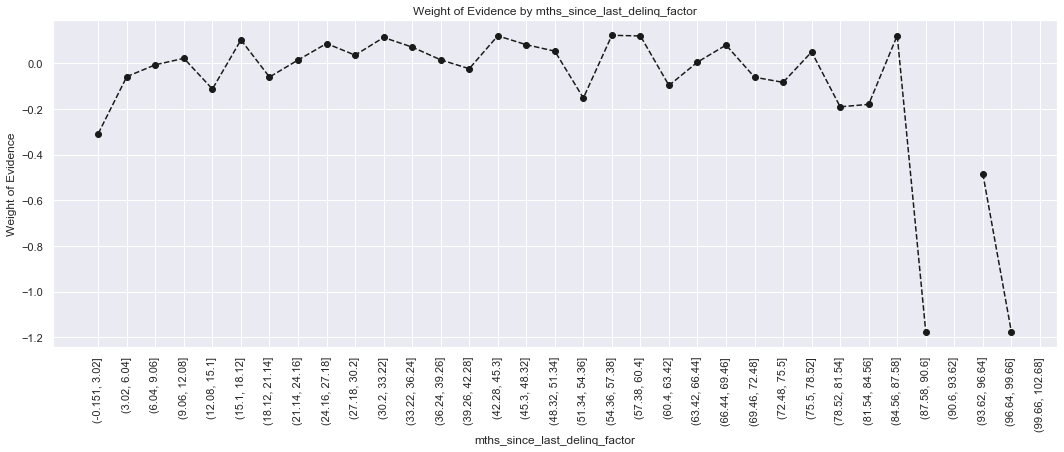

In [697]:
plot_by_woe(df_temp, 90)

In [698]:
df_inputs_prep['mths_since_last_delinq:Missing'] = np.where((df_inputs_prep['mths_since_last_delinq'].isnull()), 1, 0)
df_inputs_prep['mths_since_last_delinq:0-3'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 0) & (df_inputs_prep['mths_since_last_delinq'] <= 3), 1, 0)
df_inputs_prep['mths_since_last_delinq:4-30'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 4) & (df_inputs_prep['mths_since_last_delinq'] <= 30), 1, 0)
df_inputs_prep['mths_since_last_delinq:31-56'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 31) & (df_inputs_prep['mths_since_last_delinq'] <= 56), 1, 0)
df_inputs_prep['mths_since_last_delinq:>=57'] = np.where((df_inputs_prep['mths_since_last_delinq'] >= 57), 1, 0)

In [699]:
#dti factor
df_inputs_prep['dti_factor'] = pd.cut(df_inputs_prep['dti'], 100)
df_temp = woe_ordered_continuous(df_inputs_prep, 'dti_factor', df_targets_prep)
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",195,0.846154,0.002091,165.0,30.0,0.001955,0.003382,-0.547866,NaN,NaN,0.041457
1,"(0.4, 0.8]",194,0.932990,0.002080,181.0,13.0,0.002145,0.001465,0.380934,0.086836,0.928800,0.041457
2,"(0.8, 1.2]",222,0.887387,0.002381,197.0,25.0,0.002335,0.002818,-0.188286,0.045602,0.569220,0.041457
3,"(1.2, 1.6]",285,0.915789,0.003056,261.0,24.0,0.003093,0.002705,0.133853,0.028402,0.322139,0.041457
4,"(1.6, 2.0]",280,0.928571,0.003002,260.0,20.0,0.003081,0.002255,0.312335,0.012782,0.178483,0.041457
5,"(2.0, 2.399]",367,0.926431,0.003935,340.0,27.0,0.004029,0.003044,0.280495,0.002141,0.031841,0.041457
6,"(2.399, 2.799]",382,0.913613,0.004096,349.0,33.0,0.004136,0.003720,0.105950,0.012818,0.174544,0.041457
7,"(2.799, 3.199]",409,0.907090,0.004386,371.0,38.0,0.004396,0.004284,0.026002,0.006522,0.079948,0.041457
8,"(3.199, 3.599]",492,0.902439,0.005276,444.0,48.0,0.005262,0.005411,-0.027990,0.004651,0.053992,0.041457
9,"(3.599, 3.999]",570,0.926316,0.006112,528.0,42.0,0.006257,0.004735,0.278813,0.023877,0.306803,0.041457


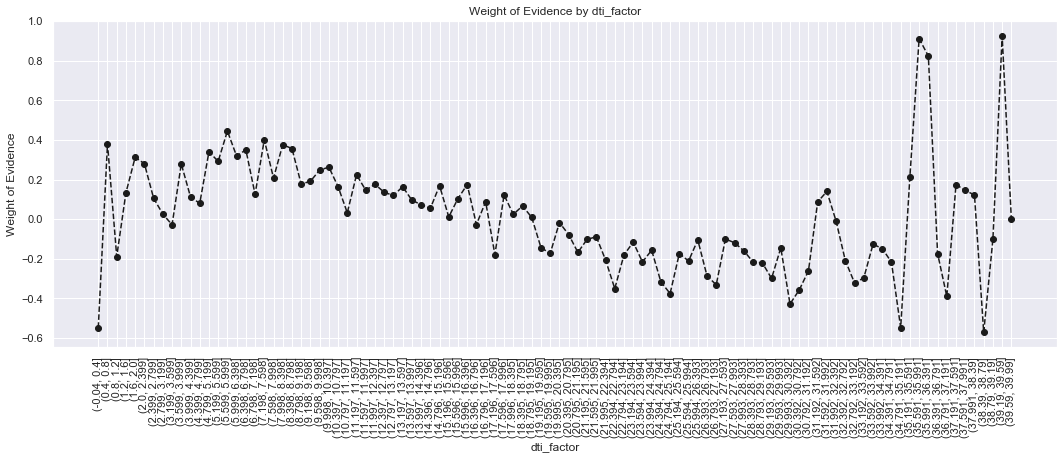

In [700]:
plot_by_woe(df_temp, 90)

In [701]:
df_inputs_prep_temp = df_inputs_prep.loc[df_inputs_prep['dti'] <= 35, : ]

In [702]:
df_inputs_prep_temp['dti_factor'] = pd.cut(df_inputs_prep_temp['dti'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'dti_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.035, 0.7]",345,0.889855,0.003728,307.0,38.0,0.003667,0.004315,-0.162741,NaN,NaN,0.036618
1,"(0.7, 1.4]",422,0.890995,0.004561,376.0,46.0,0.004491,0.005223,-0.151055,0.001140,0.011686,0.036618
2,"(1.4, 2.1]",495,0.933333,0.005349,462.0,33.0,0.005518,0.003747,0.387055,0.042338,0.538110,0.036618
3,"(2.1, 2.8]",673,0.915305,0.007273,616.0,57.0,0.007357,0.006472,0.128193,0.018029,0.258862,0.036618
4,"(2.8, 3.5]",777,0.902188,0.008397,701.0,76.0,0.008373,0.008629,-0.030228,0.013117,0.158421,0.036618
5,"(3.5, 4.2]",991,0.923310,0.010710,915.0,76.0,0.010929,0.008629,0.236188,0.021122,0.266416,0.036618
6,"(4.2, 4.9]",1175,0.914894,0.012698,1075.0,100.0,0.012840,0.011355,0.122903,0.008416,0.113285,0.036618
7,"(4.9, 5.6]",1291,0.929512,0.013952,1200.0,91.0,0.014332,0.010333,0.327215,0.014618,0.204312,0.036618
8,"(5.6, 6.3]",1455,0.930584,0.015724,1354.0,101.0,0.016172,0.011468,0.343695,0.001072,0.016481,0.036618
9,"(6.3, 7.0]",1699,0.929370,0.018361,1579.0,120.0,0.018859,0.013626,0.325053,0.001214,0.018643,0.036618


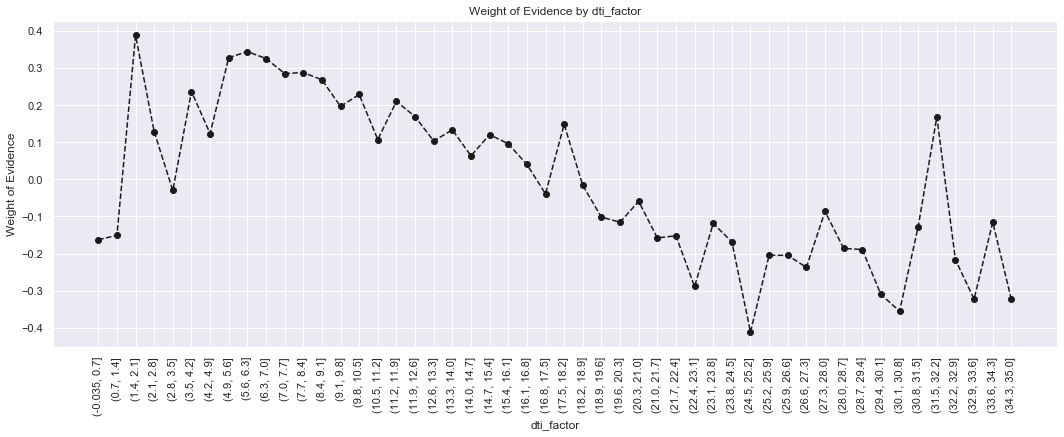

In [703]:
plot_by_woe(df_temp, 90)

In [704]:
df_inputs_prep['dti:<=1.4'] = np.where((df_inputs_prep['dti'] <= 1.4), 1, 0)
df_inputs_prep['dti:1.4-3.5'] = np.where((df_inputs_prep['dti'] > 1.4) & (df_inputs_prep['dti'] <= 3.5), 1, 0)
df_inputs_prep['dti:3.5-7.7'] = np.where((df_inputs_prep['dti'] > 3.5) & (df_inputs_prep['dti'] <= 7.7), 1, 0)
df_inputs_prep['dti:7.7-10.5'] = np.where((df_inputs_prep['dti'] > 7.7) & (df_inputs_prep['dti'] <= 10.5), 1, 0)
df_inputs_prep['dti:10.5-16.1'] = np.where((df_inputs_prep['dti'] > 10.5) & (df_inputs_prep['dti'] <= 16.1), 1, 0)
df_inputs_prep['dti:16.1-20.3'] = np.where((df_inputs_prep['dti'] > 16.1) & (df_inputs_prep['dti'] <= 20.3), 1, 0)
df_inputs_prep['dti:20.3-21.7'] = np.where((df_inputs_prep['dti'] > 20.3) & (df_inputs_prep['dti'] <= 21.7), 1, 0)
df_inputs_prep['dti:21.7-22.4'] = np.where((df_inputs_prep['dti'] > 21.7) & (df_inputs_prep['dti'] <= 22.4), 1, 0)
df_inputs_prep['dti:22.4-35'] = np.where((df_inputs_prep['dti'] > 22.4) & (df_inputs_prep['dti'] <= 35), 1, 0)
df_inputs_prep['dti:>35'] = np.where((df_inputs_prep['dti'] > 35), 1, 0)

In [705]:
df_inputs_prep_temp = df_inputs_prep[pd.notnull(df_inputs_prep['mths_since_last_record'])]
df_inputs_prep_temp['mths_since_last_record_factor'] = pd.cut(df_inputs_prep_temp['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_inputs_prep_temp, 'mths_since_last_record_factor', df_targets_prep[df_inputs_prep_temp.index])
df_temp

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.12, 2.4]",289,0.788927,0.023068,228.0,61.0,0.019930,0.056066,-1.034303,NaN,NaN,0.165315
1,"(2.4, 4.8]",16,0.937500,0.001277,15.0,1.0,0.001311,0.000919,0.355275,0.148573,1.389578,0.165315
2,"(4.8, 7.2]",43,0.930233,0.003432,40.0,3.0,0.003497,0.002757,0.237492,0.007267,0.117783,0.165315
3,"(7.2, 9.6]",41,0.926829,0.003273,38.0,3.0,0.003322,0.002757,0.186199,0.003403,0.051293,0.165315
4,"(9.6, 12.0]",82,0.902439,0.006545,74.0,8.0,0.006469,0.007353,-0.128151,0.024390,0.314350,0.165315
5,"(12.0, 14.4]",40,0.925000,0.003193,37.0,3.0,0.003234,0.002757,0.159531,0.022561,0.287682,0.165315
6,"(14.4, 16.8]",36,0.916667,0.002874,33.0,3.0,0.002885,0.002757,0.045120,0.008333,0.114410,0.165315
7,"(16.8, 19.2]",109,0.944954,0.008701,103.0,6.0,0.009003,0.005515,0.490195,0.028287,0.445074,0.165315
8,"(19.2, 21.6]",62,0.903226,0.004949,56.0,6.0,0.004895,0.005515,-0.119183,0.041728,0.609377,0.165315
9,"(21.6, 24.0]",118,0.932203,0.009419,110.0,8.0,0.009615,0.007353,0.268264,0.028978,0.387447,0.165315


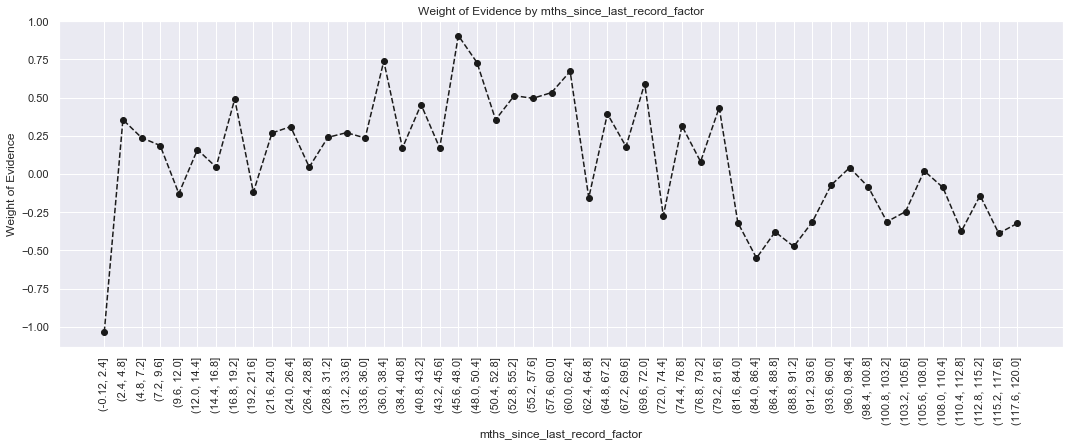

In [706]:
plot_by_woe(df_temp, 90)

In [707]:
df_inputs_prep['mths_since_last_record:Missing'] = np.where((df_inputs_prep['mths_since_last_record'].isnull()), 1, 0)
df_inputs_prep['mths_since_last_record:0-2'] = np.where((df_inputs_prep['mths_since_last_record'] >= 0) & (df_inputs_prep['mths_since_last_record'] <= 2), 1, 0)
df_inputs_prep['mths_since_last_record:3-20'] = np.where((df_inputs_prep['mths_since_last_record'] >= 3) & (df_inputs_prep['mths_since_last_record'] <= 20), 1, 0)
df_inputs_prep['mths_since_last_record:21-31'] = np.where((df_inputs_prep['mths_since_last_record'] >= 21) & (df_inputs_prep['mths_since_last_record'] <= 31), 1, 0)
df_inputs_prep['mths_since_last_record:32-80'] = np.where((df_inputs_prep['mths_since_last_record'] >= 32) & (df_inputs_prep['mths_since_last_record'] <= 80), 1, 0)
df_inputs_prep['mths_since_last_record:81-86'] = np.where((df_inputs_prep['mths_since_last_record'] >= 81) & (df_inputs_prep['mths_since_last_record'] <= 86), 1, 0)
df_inputs_prep['mths_since_last_record:>=86'] = np.where((df_inputs_prep['mths_since_last_record'] >= 86), 1, 0)

In [708]:
#Contains the train and test data set with all dummies variables
#loan_data_inputs_train = df_inputs_prep
loan_data_inputs_test = df_inputs_prep

In [710]:
print(loan_data_inputs_train.shape)
print(loan_data_inputs_test.shape)
print(loan_data_targets_train.shape)
print(loan_data_targets_test.shape)

(373028, 322)
(93257, 322)
(373028,)
(93257,)


In [711]:
loan_data_inputs_train.to_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_inputs_train.csv')
loan_data_targets_train.to_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_targets_train.csv')
loan_data_inputs_test.to_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_inputs_test.csv')
loan_data_targets_test.to_csv(r'D:\DataBases\DataSets\Credit_Risk_Modeling\loan_data_targets_test.csv')